In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Load datasets
df = pd.read_csv('C:/Users/Amruth PC/Desktop/Hackathon/LTFS/train_fwYjLYX.csv')

In [2]:
df_date=pd.read_csv('C:/Users/Amruth PC/Desktop/Hackathon/LTFS/holidays.csv')
df_date['DATE']=pd.to_datetime(df_date['DATE'])

In [3]:
df_date.head()
df_date['Holiday']=1

In [4]:
df_date.head()

DAY       DATE                   HOLIDAY  Holiday
0    Sunday 2017-01-01            New Year's Day        1
1  Saturday 2017-01-14  Makar Sankranti / Pongal        1
2  Thursday 2017-01-26              Republic Day        1
3    Friday 2017-02-24           Maha Shivaratri        1
4    Monday 2017-03-13                      Holi        1

In [5]:
df['branch_id'].unique()

array([  1.,   3.,   5.,   7.,   8.,   9.,  10.,  11.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  29.,  34.,  35.,  36.,  42.,
        43.,  48.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  72.,  73.,  74.,  76.,  77.,  78.,  79.,  82.,  84.,  85.,
       100., 101., 103., 104., 105., 111., 117., 120., 121., 135., 136.,
       137., 147., 159., 165., 202., 207., 217., 248., 249., 250., 251.,
       254., 255., 257., 258., 259., 260., 261., 262., 263., 264., 265.,
       266., 267., 268., 269., 270., 271.,  nan])

In [6]:
df.head()

application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0

In [7]:
df['state'].unique()

array(['WEST BENGAL', 'DELHI', 'KARNATAKA', 'TAMIL NADU', 'UTTAR PRADESH',
       'PUNJAB', 'TELANGANA', 'ANDHRA PRADESH', 'MAHARASHTRA', 'ORISSA',
       'GUJARAT', 'ASSAM', 'JHARKHAND', 'UTTARAKHAND', 'KERALA',
       'CHHATTISGARH', 'BIHAR', 'TRIPURA', 'MADHYA PRADESH', 'HARYANA'],
      dtype=object)

In [8]:
#df[(df['application_date']=='2017-04-01') & (df['state']=='KARNATAKA')]
df[(df['segment']==1) & (df['state']=='ANDHRA PRADESH') & (df['application_date']=='2017-04-01')]

application_date  segment  branch_id           state   zone  case_count
9672        2017-04-01        1       17.0  ANDHRA PRADESH  SOUTH         0.0
23374       2017-04-01        1       66.0  ANDHRA PRADESH  SOUTH         0.0
39494       2017-04-01        1      111.0  ANDHRA PRADESH  SOUTH         0.0
59644       2017-04-01        1      263.0  ANDHRA PRADESH  SOUTH         0.0
61256       2017-04-01        1      265.0  ANDHRA PRADESH  SOUTH         0.0
62868       2017-04-01        1      267.0  ANDHRA PRADESH  SOUTH         0.0

In [9]:
#df[(df['application_date']=='2017-04-01') & (df['state']=='KARNATAKA')]
df[(df['segment']==2)]['application_date'].unique()

array(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
       '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
       '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12',
       '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
       '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
       '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24',
       '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
       '2017-04-29', '2017-04-30', '2017-05-01', '2017-05-02',
       '2017-05-03', '2017-05-04', '2017-05-05', '2017-05-06',
       '2017-05-07', '2017-05-08', '2017-05-09', '2017-05-10',
       '2017-05-11', '2017-05-12', '2017-05-13', '2017-05-14',
       '2017-05-15', '2017-05-16', '2017-05-17', '2017-05-18',
       '2017-05-19', '2017-05-20', '2017-05-21', '2017-05-22',
       '2017-05-23', '2017-05-24', '2017-05-25', '2017-05-26',
       '2017-05-27', '2017-05-28', '2017-05-29', '2017-05-30',
       '2017-05-31', '2017-06-01', '2017-06-02', '2017-

In [10]:
df[(df['segment']==2) & (df['application_date']=='2017-04-01')]

application_date  segment  branch_id           state zone  case_count
66898       2017-04-01        2        NaN           ASSAM  NaN         0.0
67742       2017-04-01        2        NaN           BIHAR  NaN         0.0
68586       2017-04-01        2        NaN    CHHATTISGARH  NaN        34.0
69430       2017-04-01        2        NaN         GUJARAT  NaN         0.0
70274       2017-04-01        2        NaN         HARYANA  NaN         0.0
71118       2017-04-01        2        NaN       JHARKHAND  NaN         0.0
71962       2017-04-01        2        NaN          KERALA  NaN        23.0
72806       2017-04-01        2        NaN       KARNATAKA  NaN       165.0
73650       2017-04-01        2        NaN     MAHARASHTRA  NaN         0.0
74494       2017-04-01        2        NaN  MADHYA PRADESH  NaN        36.0
75338       2017-04-01        2        NaN          ORISSA  NaN       111.0
76182       2017-04-01        2        NaN          PUNJAB  NaN         0.0
77026       2017-04-01        2        NaN      TAMIL NADU  NaN       458.0
77870       2017-04-01        2        NaN         TRIPURA  NaN         0.0
78714       2017-04-01        2        NaN   UTTAR PRADESH  NaN        27.0
79558       2017-04-01        2        NaN     WEST BENGAL  NaN        43.0

In [11]:
df_test = pd.read_csv('C:/Users/Amruth PC/Desktop/Hackathon/LTFS/test_1eLl9Yf.csv')

In [12]:
df_test.head(10)

id application_date  segment
0   1       2019-07-06        1
1   2       2019-07-07        1
2   3       2019-07-08        1
3   4       2019-07-09        1
4   5       2019-07-10        1
5   6       2019-07-11        1
6   7       2019-07-12        1
7   8       2019-07-13        1
8   9       2019-07-14        1
9  10       2019-07-15        1

In [13]:
df_test[(df_test['application_date']=='2019-07-24')]

id application_date  segment
18  19       2019-07-24        1
87  88       2019-07-24        2

In [14]:
data_ANDHRA=df[(df['segment']==1) & (df['state']=='ANDHRA PRADESH') ]

In [15]:
data_ANDHRA['application_date']=pd.to_datetime(data_ANDHRA['application_date'])

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
data_ANDHRA.dtypes

application_date    datetime64[ns]
segment                      int64
branch_id                  float64
state                       object
zone                        object
case_count                 float64
dtype: object

In [17]:
##data_ANDHRA.set_index(data_ANDHRA['application_date'],inplace=True)

In [18]:
#data_ANDHRA['application_date']=add_freq(data_ANDHRA['application_date'], freq='D')

In [19]:
#data_ANDHRA.set_index('application_date',inplace=True)

In [20]:
data_ANDHRA.head()

application_date  segment  branch_id           state   zone  case_count
9672       2017-04-01        1       17.0  ANDHRA PRADESH  SOUTH         0.0
9673       2017-04-03        1       17.0  ANDHRA PRADESH  SOUTH         0.0
9674       2017-04-04        1       17.0  ANDHRA PRADESH  SOUTH         0.0
9675       2017-04-05        1       17.0  ANDHRA PRADESH  SOUTH         9.0
9676       2017-04-07        1       17.0  ANDHRA PRADESH  SOUTH         5.0

In [21]:
def add_freq(idx, freq=None):
    """Add a frequency attribute to idx, through inference or directly.

    Returns a copy.  If `freq` is None, it is inferred.
    """

    idx = idx.copy()
    if freq is None:
        if idx.freq is None:
            freq = pd.infer_freq(idx)
        else:
            return idx
    idx.freq = pd.tseries.frequencies.to_offset(freq)
    if idx.freq is None:
        raise AttributeError('no discernible frequency found to `idx`.  Specify'
                             ' a frequency string with `freq`.')
    return idx

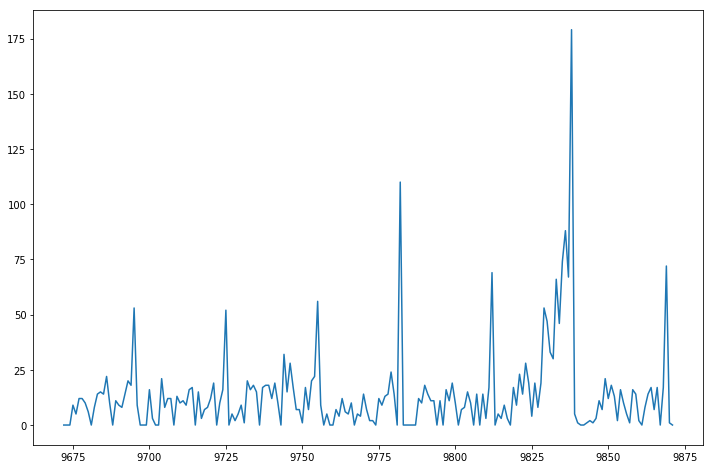

In [22]:
data_ANDHRA['case_count'].iloc[:200].plot(figsize=(12,8))

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
df['application_date']=pd.to_datetime(df['application_date'])

In [25]:
df.head()

application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0

In [26]:
print(max(df.application_date))
print(min(df.application_date))

2019-07-23 00:00:00
2017-04-01 00:00:00


In [27]:
df_date_main=df_date[(df_date['DATE']>=min(df.application_date)) & (df_date['DATE']<=max(df.application_date))][['DATE','Holiday']]

In [28]:
df_date_main.head()

DATE  Holiday
6  2017-04-05        1
7  2017-04-09        1
8  2017-04-14        1
9  2017-05-01        1
10 2017-05-10        1

In [29]:
df_date_main=df_date_main.set_index('DATE')

In [30]:
min(df.application_date)

Timestamp('2017-04-01 00:00:00')

In [31]:
df_date_forecast=df_date[(df_date['DATE']>='2019-07-06 00:00:00') & (df_date['DATE']<='2019-09-30 00:00:00')][['DATE','Holiday']]
df_date_forecast['DATE']=pd.to_datetime(df_date_forecast['DATE'])

In [32]:
df_date_forecast=df_date_forecast.reset_index()[['DATE','Holiday']]

In [33]:
df_date_forecast=df_date[(df_date['DATE']>='2019-07-06 00:00:00') & (df_date['DATE']<='2019-09-30 00:00:00')][['DATE','Holiday']]
df_date_forecast['DATE']=pd.to_datetime(df_date_forecast['DATE'])
df_date_forecast=df_date_forecast.reset_index()[['DATE','Holiday']]
idx2 = pd.date_range('2019-07-06 00:00:00', '2019-09-30 00:00:00')
fdate=pd.DataFrame(idx2)
fdate.columns=['DATE']

ls=[]
for i in fdate.DATE:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
fdate['Sunday']=ls

In [34]:
df_date_forecast

DATE  Holiday
0 2019-08-12        1
1 2019-08-15        1
2 2019-08-15        1
3 2019-08-24        1
4 2019-09-02        1
5 2019-09-10        1
6 2019-09-11        1

In [35]:
df_date_forecast=pd.merge(fdate,df_date_forecast,left_on='DATE',right_on='DATE',how='left').fillna(0)

In [36]:
df_date_forecast

DATE  Sunday  Holiday
0  2019-07-06       0      0.0
1  2019-07-07       1      0.0
2  2019-07-08       0      0.0
3  2019-07-09       0      0.0
4  2019-07-10       0      0.0
5  2019-07-11       0      0.0
6  2019-07-12       0      0.0
7  2019-07-13       0      0.0
8  2019-07-14       1      0.0
9  2019-07-15       0      0.0
10 2019-07-16       0      0.0
11 2019-07-17       0      0.0
12 2019-07-18       0      0.0
13 2019-07-19       0      0.0
14 2019-07-20       0      0.0
15 2019-07-21       1      0.0
16 2019-07-22       0      0.0
17 2019-07-23       0      0.0
18 2019-07-24       0      0.0
19 2019-07-25       0      0.0
20 2019-07-26       0      0.0
21 2019-07-27       0      0.0
22 2019-07-28       1      0.0
23 2019-07-29       0      0.0
24 2019-07-30       0      0.0
25 2019-07-31       0      0.0
26 2019-08-01       0      0.0
27 2019-08-02       0      0.0
28 2019-08-03       0      0.0
29 2019-08-04       1      0.0
..        ...     ...      ...
58 2019-09-01       1      0.0
59 2019-09-02       0      1.0
60 2019-09-03       0      0.0
61 2019-09-04       0      0.0
62 2019-09-05       0      0.0
63 2019-09-06       0      0.0
64 2019-09-07       0      0.0
65 2019-09-08       1      0.0
66 2019-09-09       0      0.0
67 2019-09-10       0      1.0
68 2019-09-11       0      1.0
69 2019-09-12       0      0.0
70 2019-09-13       0      0.0
71 2019-09-14       0      0.0
72 2019-09-15       1      0.0
73 2019-09-16       0      0.0
74 2019-09-17       0      0.0
75 2019-09-18       0      0.0
76 2019-09-19       0      0.0
77 2019-09-20       0      0.0
78 2019-09-21       0      0.0
79 2019-09-22       1      0.0
80 2019-09-23       0      0.0
81 2019-09-24       0      0.0
82 2019-09-25       0      0.0
83 2019-09-26       0      0.0
84 2019-09-27       0      0.0
85 2019-09-28       0      0.0
86 2019-09-29       1      0.0
87 2019-09-30       0      0.0

[88 rows x 3 columns]

In [37]:
df_date_forecast['test_holiday'] = df_date_forecast['Sunday']+df_date_forecast['Holiday']
ds=[]
for i in df_date_forecast['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
df_date_forecast['test_holiday']=ds
    

In [38]:
df_date_forecast.drop_duplicates(subset=None, keep='first', inplace=True)

In [39]:
df_date_forecast=df_date_forecast.set_index('DATE')

In [40]:
df_date_forecast.index.freq='D'

In [41]:
df_date_forecast

Sunday  Holiday  test_holiday
DATE                                     
2019-07-06       0      0.0             0
2019-07-07       1      0.0             1
2019-07-08       0      0.0             0
2019-07-09       0      0.0             0
2019-07-10       0      0.0             0
2019-07-11       0      0.0             0
2019-07-12       0      0.0             0
2019-07-13       0      0.0             0
2019-07-14       1      0.0             1
2019-07-15       0      0.0             0
2019-07-16       0      0.0             0
2019-07-17       0      0.0             0
2019-07-18       0      0.0             0
2019-07-19       0      0.0             0
2019-07-20       0      0.0             0
2019-07-21       1      0.0             1
2019-07-22       0      0.0             0
2019-07-23       0      0.0             0
2019-07-24       0      0.0             0
2019-07-25       0      0.0             0
2019-07-26       0      0.0             0
2019-07-27       0      0.0             0
2019-07-28       1      0.0             1
2019-07-29       0      0.0             0
2019-07-30       0      0.0             0
2019-07-31       0      0.0             0
2019-08-01       0      0.0             0
2019-08-02       0      0.0             0
2019-08-03       0      0.0             0
2019-08-04       1      0.0             1
...            ...      ...           ...
2019-09-01       1      0.0             1
2019-09-02       0      1.0             1
2019-09-03       0      0.0             0
2019-09-04       0      0.0             0
2019-09-05       0      0.0             0
2019-09-06       0      0.0             0
2019-09-07       0      0.0             0
2019-09-08       1      0.0             1
2019-09-09       0      0.0             0
2019-09-10       0      1.0             1
2019-09-11       0      1.0             1
2019-09-12       0      0.0             0
2019-09-13       0      0.0             0
2019-09-14       0      0.0             0
2019-09-15       1      0.0             1
2019-09-16       0      0.0             0
2019-09-17       0      0.0             0
2019-09-18       0      0.0             0
2019-09-19       0      0.0             0
2019-09-20       0      0.0             0
2019-09-21       0      0.0             0
2019-09-22       1      0.0             1
2019-09-23       0      0.0             0
2019-09-24       0      0.0             0
2019-09-25       0      0.0             0
2019-09-26       0      0.0             0
2019-09-27       0      0.0             0
2019-09-28       0      0.0             0
2019-09-29       1      0.0             1
2019-09-30       0      0.0             0

[87 rows x 3 columns]

In [42]:
import numpy as np

In [43]:
seg1_data=df[df['segment']==1].groupby(['application_date','segment']).agg({'case_count':[np.sum]})

In [44]:
data_seg1=seg1_data.reset_index()

In [45]:
data_seg1.columns=['application_date','segment','case_count']

In [46]:
data_seg1.dtypes

application_date    datetime64[ns]
segment                      int64
case_count                 float64
dtype: object

In [47]:
min(data_seg1.application_date)

Timestamp('2017-04-01 00:00:00')

In [48]:
max(data_seg1.application_date)

Timestamp('2019-07-05 00:00:00')

In [49]:
tm_df=data_seg1[['application_date','case_count']]

In [50]:
tm_df=tm_df.sort_values(['application_date'],ascending = True)

In [51]:
idx = pd.date_range(min(tm_df.application_date), max(tm_df.application_date))
tm_df=tm_df.set_index('application_date')
tm_df=tm_df.reindex(idx, fill_value=0)

In [52]:
tm_df.head()

case_count
2017-04-01       299.0
2017-04-02         0.0
2017-04-03        42.0
2017-04-04        23.0
2017-04-05      1530.0

In [53]:
tm_df.tail()

case_count
2019-07-01      3650.0
2019-07-02      3212.0
2019-07-03      3824.0
2019-07-04      4240.0
2019-07-05        13.0

In [54]:
tm_df=pd.concat([tm_df,df_date_main],axis=1).fillna(0)

In [55]:
ls=[]
for i in tm_df.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)


In [56]:
tm_df['Sunday']=ls

In [57]:
tm_df['test_holiday'] = tm_df['Sunday']+tm_df['Holiday']
ds=[]
for i in tm_df['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df['test_holiday']=ds
    

In [58]:
tm_df

case_count  Holiday  Sunday  test_holiday
2017-04-01       299.0      0.0       0             0
2017-04-02         0.0      0.0       1             1
2017-04-03        42.0      0.0       0             0
2017-04-04        23.0      0.0       0             0
2017-04-05      1530.0      1.0       0             1
2017-04-06         0.0      0.0       0             0
2017-04-07      1341.0      0.0       0             0
2017-04-08         0.0      0.0       0             0
2017-04-09         0.0      1.0       1             1
2017-04-10         0.0      0.0       0             0
2017-04-11         0.0      0.0       0             0
2017-04-12      1468.0      0.0       0             0
2017-04-13      1340.0      0.0       0             0
2017-04-14      1330.0      1.0       0             1
2017-04-15       981.0      0.0       0             0
2017-04-16       409.0      0.0       1             1
2017-04-17      1515.0      0.0       0             0
2017-04-18      1442.0      0.0       0             0
2017-04-19      1404.0      0.0       0             0
2017-04-20      1350.0      0.0       0             0
2017-04-21      1390.0      0.0       0             0
2017-04-22      1060.0      0.0       0             0
2017-04-23       380.0      0.0       1             1
2017-04-24      1626.0      0.0       0             0
2017-04-25      1450.0      0.0       0             0
2017-04-26      1546.0      0.0       0             0
2017-04-27      1710.0      0.0       0             0
2017-04-28      1927.0      0.0       0             0
2017-04-29      1355.0      0.0       0             0
2017-04-30      6472.0      0.0       1             1
...                ...      ...     ...           ...
2019-06-06      3768.0      0.0       0             0
2019-06-07      3847.0      0.0       0             0
2019-06-08      2724.0      0.0       0             0
2019-06-09      1700.0      0.0       1             1
2019-06-10      4174.0      0.0       0             0
2019-06-11      3586.0      0.0       0             0
2019-06-12      3786.0      0.0       0             0
2019-06-13      3623.0      0.0       0             0
2019-06-14      3498.0      0.0       0             0
2019-06-15      2776.0      0.0       0             0
2019-06-16      1760.0      0.0       1             1
2019-06-17      4279.0      0.0       0             0
2019-06-18      3301.0      0.0       0             0
2019-06-19      3810.0      0.0       0             0
2019-06-20      3538.0      0.0       0             0
2019-06-21      3432.0      0.0       0             0
2019-06-22      2512.0      0.0       0             0
2019-06-23      1633.0      0.0       1             1
2019-06-24      3804.0      0.0       0             0
2019-06-25      3154.0      0.0       0             0
2019-06-26      3443.0      0.0       0             0
2019-06-27      3500.0      0.0       0             0
2019-06-28      3519.0      0.0       0             0
2019-06-29      2894.0      0.0       0             0
2019-06-30      1951.0      0.0       1             1
2019-07-01      3650.0      0.0       0             0
2019-07-02      3212.0      0.0       0             0
2019-07-03      3824.0      0.0       0             0
2019-07-04      4240.0      1.0       0             1
2019-07-05        13.0      0.0       0             0

[826 rows x 4 columns]

In [59]:
tm_df.head()

case_count  Holiday  Sunday  test_holiday
2017-04-01       299.0      0.0       0             0
2017-04-02         0.0      0.0       1             1
2017-04-03        42.0      0.0       0             0
2017-04-04        23.0      0.0       0             0
2017-04-05      1530.0      1.0       0             1

In [60]:
#forecast_date_main=tm_df[]
tm_df

case_count  Holiday  Sunday  test_holiday
2017-04-01       299.0      0.0       0             0
2017-04-02         0.0      0.0       1             1
2017-04-03        42.0      0.0       0             0
2017-04-04        23.0      0.0       0             0
2017-04-05      1530.0      1.0       0             1
2017-04-06         0.0      0.0       0             0
2017-04-07      1341.0      0.0       0             0
2017-04-08         0.0      0.0       0             0
2017-04-09         0.0      1.0       1             1
2017-04-10         0.0      0.0       0             0
2017-04-11         0.0      0.0       0             0
2017-04-12      1468.0      0.0       0             0
2017-04-13      1340.0      0.0       0             0
2017-04-14      1330.0      1.0       0             1
2017-04-15       981.0      0.0       0             0
2017-04-16       409.0      0.0       1             1
2017-04-17      1515.0      0.0       0             0
2017-04-18      1442.0      0.0       0             0
2017-04-19      1404.0      0.0       0             0
2017-04-20      1350.0      0.0       0             0
2017-04-21      1390.0      0.0       0             0
2017-04-22      1060.0      0.0       0             0
2017-04-23       380.0      0.0       1             1
2017-04-24      1626.0      0.0       0             0
2017-04-25      1450.0      0.0       0             0
2017-04-26      1546.0      0.0       0             0
2017-04-27      1710.0      0.0       0             0
2017-04-28      1927.0      0.0       0             0
2017-04-29      1355.0      0.0       0             0
2017-04-30      6472.0      0.0       1             1
...                ...      ...     ...           ...
2019-06-06      3768.0      0.0       0             0
2019-06-07      3847.0      0.0       0             0
2019-06-08      2724.0      0.0       0             0
2019-06-09      1700.0      0.0       1             1
2019-06-10      4174.0      0.0       0             0
2019-06-11      3586.0      0.0       0             0
2019-06-12      3786.0      0.0       0             0
2019-06-13      3623.0      0.0       0             0
2019-06-14      3498.0      0.0       0             0
2019-06-15      2776.0      0.0       0             0
2019-06-16      1760.0      0.0       1             1
2019-06-17      4279.0      0.0       0             0
2019-06-18      3301.0      0.0       0             0
2019-06-19      3810.0      0.0       0             0
2019-06-20      3538.0      0.0       0             0
2019-06-21      3432.0      0.0       0             0
2019-06-22      2512.0      0.0       0             0
2019-06-23      1633.0      0.0       1             1
2019-06-24      3804.0      0.0       0             0
2019-06-25      3154.0      0.0       0             0
2019-06-26      3443.0      0.0       0             0
2019-06-27      3500.0      0.0       0             0
2019-06-28      3519.0      0.0       0             0
2019-06-29      2894.0      0.0       0             0
2019-06-30      1951.0      0.0       1             1
2019-07-01      3650.0      0.0       0             0
2019-07-02      3212.0      0.0       0             0
2019-07-03      3824.0      0.0       0             0
2019-07-04      4240.0      1.0       0             1
2019-07-05        13.0      0.0       0             0

[826 rows x 4 columns]

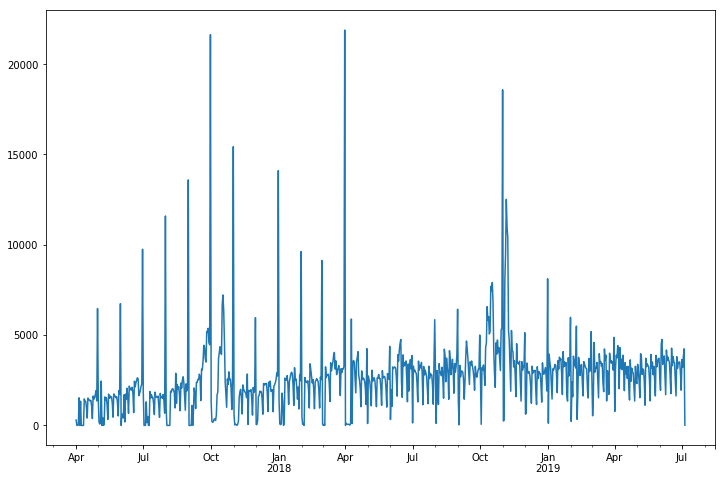

In [61]:
tm_df['case_count'].plot(figsize=(12,8))

In [62]:
tm_df.index

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10',
               ...
               '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29',
               '2019-06-30', '2019-07-01', '2019-07-02', '2019-07-03',
               '2019-07-04', '2019-07-05'],
              dtype='datetime64[ns]', length=826, freq='D')

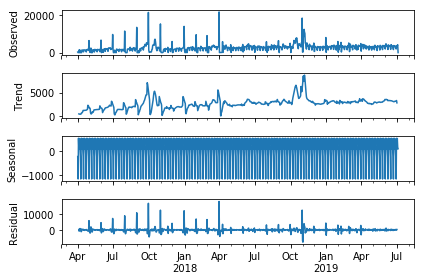

In [63]:
result=seasonal_decompose(tm_df['case_count'])
result.plot();

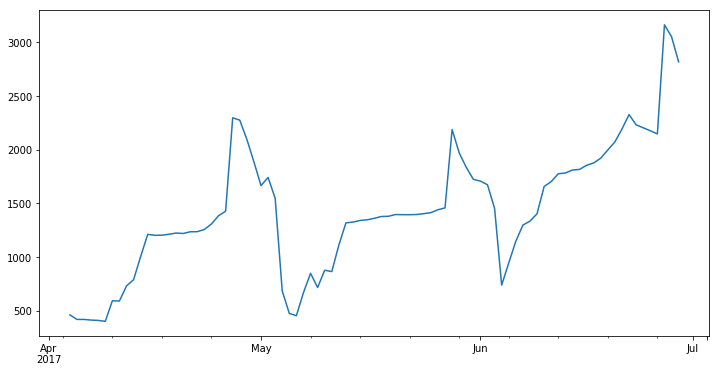

In [64]:
result.trend.iloc[:90].plot(figsize=(12,6))

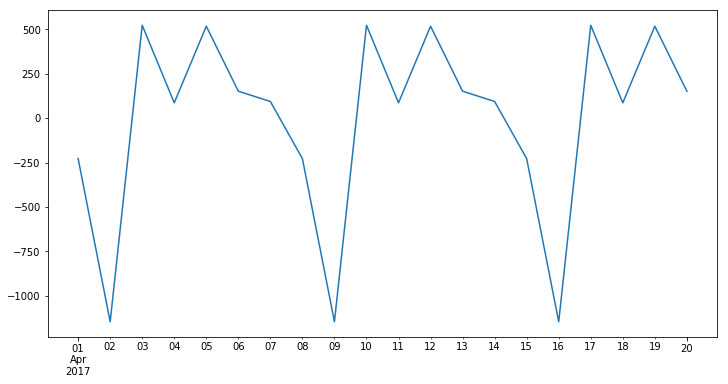

In [65]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

In [66]:
len(tm_df)-90

736

In [67]:
len(tm_df)-90
train=tm_df.iloc[:736]
test=tm_df.iloc[736:]

In [68]:
from pmdarima import auto_arima

In [69]:
auto_arima(train['case_count'],exogenous=train[['Holiday']],seasonal=True,m=30,trace=True).summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 30); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 30); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 30); AIC=13658.513, BIC=13672.313, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 30); AIC=13489.781, BIC=13512.781, Fit time=1.032 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 30); AIC=13278.566, BIC=13301.566, Fit time=19.999 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 30); AIC=13275.427, BIC=13303.026, Fit time=16.730 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 30); AIC=13280.974, BIC=13303.973, Fit time=4.096 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 30); AIC=13277.428, BIC=13309.627, Fit time=26.742 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 30); AIC=13293.551, BIC=13311.950, Fit time=0.419 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 2, 30); AIC=13279.801, BIC=13316.600, Fit time=59.202 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 30); AIC=13265.972, BIC=13298.171, Fit time=18.420 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 30); AIC=13482.846, BIC=13510.446, Fit time=1.858 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 30); AIC=13269.936, BIC=13306.735, Fit time=16.729 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 30); AIC=13636.979, BIC=13659.979, Fit time=1.682 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 30); AIC=13273.222, BIC=13300.821, Fit time=8.112 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 30); AIC=13271.316, BIC=13308.115, Fit time=56.263 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 30); AIC=13276.075, BIC=13303.675, Fit time=11.704 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 30); AIC=13277.340, BIC=13314.139, Fit time=43.355 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 30); AIC=13284.171, BIC=13307.171, Fit time=0.748 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 2, 30); AIC=13280.994, BIC=13322.393, Fit time=47.438 seconds


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 30); AIC=13269.794, BIC=13306.593, Fit time=11.051 seconds
Total fit time: 345.799 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  736
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 30)   Log Likelihood               -6625.986
Date:                            Thu, 13 Feb 2020   AIC                          13265.972
Time:                                    14:41:25   BIC                          13298.171
Sample:                                         0   HQIC                         13278.391
                                            - 736                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5251      8.763      0.516      0.606     -12.650      21.700
x1          -418.7967    310.734     -1.348      0.178   -1027.823     190.230
ar.L1          0.1425      0.025      5.592      0.000       0.093       0.192
ma.L1         -0.9528      0.012    -80.302      0.000      -0.976      -0.930
ar.S.L30      -0.4913      0.105     -4.686      0.000      -0.697      -0.286
ma.S.L30       0.6436      0.094      6.827      0.000       0.459       0.828
sigma2      3.944e+06   8.97e+04     43.981      0.000    3.77e+06    4.12e+06
===================================================================================
Ljung-Box (Q):                      107.51   Jarque-Bera (JB):             24263.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             3.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [71]:
model=SARIMAX(train['case_count'],exog=train[['Holiday']],order=(1,1,2),seasonal_order=(1,0,1,7),enforce_invertibility=False)
#model=SARIMAX(train['case_count'],exog=train[['Holiday']],order=(1,1,1),seasonal_order=(0,0,2,),enforce_invertibility=False)
result=model.fit()
#fcast=result.predict(start=len(df),end=len(df)+11,typ='levels').rename('SARIMAX Future')
result.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                        case_count   No. Observations:                  736
Model:             SARIMAX(1, 1, 2)x(1, 0, 1, 7)   Log Likelihood               -6623.983
Date:                           Sun, 26 Jan 2020   AIC                          13261.967
Time:                                   20:19:47   BIC                          13294.166
Sample:                               04-01-2017   HQIC                         13274.385
                                    - 04-06-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Holiday     -424.1563    231.388     -1.833      0.067    -877.669      29.356
ar.L1          0.4219      0.190      2.221      0.026       0.050       0.794
ma.L1         -1.2286      0.191     -6.420      0.000      -1.604      -0.853
ma.L2          0.2588      0.178      1.451      0.147      -0.091       0.608
ar.S.L7        0.9980      0.007    142.110      0.000       0.984       1.012
ma.S.L7       -0.9840      0.027    -36.365      0.000      -1.037      -0.931
sigma2      4.427e+06      0.013   3.46e+08      0.000    4.43e+06    4.43e+06
===================================================================================
Ljung-Box (Q):                      128.66   Jarque-Bera (JB):             34985.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             4.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.85e+23. Standard errors may be unstable.
"""

In [72]:
start=len(train)
end=len(train)+len(test)-1

In [73]:
predictions=result.predict(start,end,exog=test[['Holiday']]).rename('SARIMAX predictions')

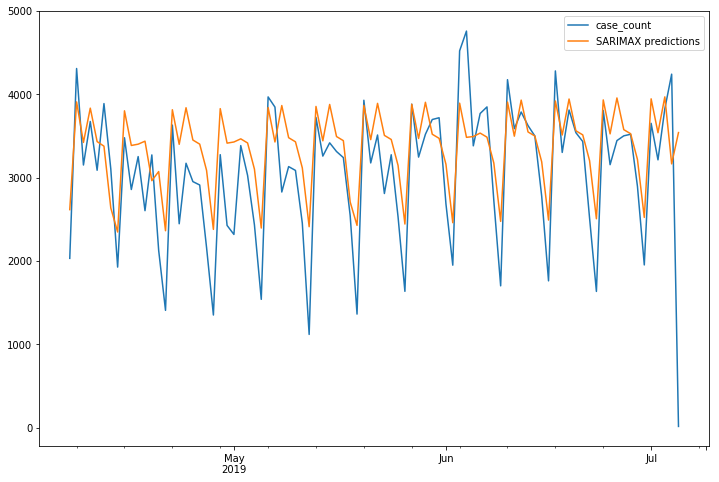

In [74]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [75]:
predictions.mean()

3365.7578185190628

In [76]:
test['case_count'].mean()

3039.8

In [77]:
from statsmodels.tools.eval_measures import rmse

In [78]:
error=rmse(test['case_count'],predictions)
error

663.3717184024068

In [79]:
tm_df

case_count  Holiday  Sunday  test_holiday
2017-04-01       299.0      0.0       0             0
2017-04-02         0.0      0.0       1             1
2017-04-03        42.0      0.0       0             0
2017-04-04        23.0      0.0       0             0
2017-04-05      1530.0      1.0       0             1
2017-04-06         0.0      0.0       0             0
2017-04-07      1341.0      0.0       0             0
2017-04-08         0.0      0.0       0             0
2017-04-09         0.0      1.0       1             1
2017-04-10         0.0      0.0       0             0
2017-04-11         0.0      0.0       0             0
2017-04-12      1468.0      0.0       0             0
2017-04-13      1340.0      0.0       0             0
2017-04-14      1330.0      1.0       0             1
2017-04-15       981.0      0.0       0             0
2017-04-16       409.0      0.0       1             1
2017-04-17      1515.0      0.0       0             0
2017-04-18      1442.0      0.0       0             0
2017-04-19      1404.0      0.0       0             0
2017-04-20      1350.0      0.0       0             0
2017-04-21      1390.0      0.0       0             0
2017-04-22      1060.0      0.0       0             0
2017-04-23       380.0      0.0       1             1
2017-04-24      1626.0      0.0       0             0
2017-04-25      1450.0      0.0       0             0
2017-04-26      1546.0      0.0       0             0
2017-04-27      1710.0      0.0       0             0
2017-04-28      1927.0      0.0       0             0
2017-04-29      1355.0      0.0       0             0
2017-04-30      6472.0      0.0       1             1
...                ...      ...     ...           ...
2019-06-06      3768.0      0.0       0             0
2019-06-07      3847.0      0.0       0             0
2019-06-08      2724.0      0.0       0             0
2019-06-09      1700.0      0.0       1             1
2019-06-10      4174.0      0.0       0             0
2019-06-11      3586.0      0.0       0             0
2019-06-12      3786.0      0.0       0             0
2019-06-13      3623.0      0.0       0             0
2019-06-14      3498.0      0.0       0             0
2019-06-15      2776.0      0.0       0             0
2019-06-16      1760.0      0.0       1             1
2019-06-17      4279.0      0.0       0             0
2019-06-18      3301.0      0.0       0             0
2019-06-19      3810.0      0.0       0             0
2019-06-20      3538.0      0.0       0             0
2019-06-21      3432.0      0.0       0             0
2019-06-22      2512.0      0.0       0             0
2019-06-23      1633.0      0.0       1             1
2019-06-24      3804.0      0.0       0             0
2019-06-25      3154.0      0.0       0             0
2019-06-26      3443.0      0.0       0             0
2019-06-27      3500.0      0.0       0             0
2019-06-28      3519.0      0.0       0             0
2019-06-29      2894.0      0.0       0             0
2019-06-30      1951.0      0.0       1             1
2019-07-01      3650.0      0.0       0             0
2019-07-02      3212.0      0.0       0             0
2019-07-03      3824.0      0.0       0             0
2019-07-04      4240.0      1.0       0             1
2019-07-05        13.0      0.0       0             0

[826 rows x 4 columns]

In [80]:
len(tm_df)

826

In [81]:
model=SARIMAX(tm_df['case_count'],exog=tm_df[['Holiday']],order=(1,1,2),seasonal_order=(1,0,1,7),enforce_invertibility=False)
result=model.fit()
fcast_s1=result.predict(start=len(tm_df),end=len(tm_df)+86,exog=df_date_forecast[['Holiday']],typ='levels').rename('SARIMAX Future')


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [82]:
fcast_s1.to_csv('C:/Users/Amruth PC/Desktop/Hackathon/LTFS/seg1.csv')

In [83]:
df_date_forecast=df_date[(df_date['DATE']>='2019-07-06 00:00:00') & (df_date['DATE']<='2019-09-30 00:00:00')][['DATE','Holiday']]
df_date_forecast['DATE']=pd.to_datetime(df_date_forecast['DATE'])
df_date_forecast=df_date_forecast.reset_index()[['DATE','Holiday']]
idx2 = pd.date_range('2019-07-24 00:00:00', '2019-10-24 00:00:00')
fdate=pd.DataFrame(idx2)
fdate.columns=['DATE']

ls=[]
for i in fdate.DATE:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
fdate['Sunday']=ls
df_date_forecast=pd.merge(fdate,df_date_forecast,left_on='DATE',right_on='DATE',how='left').fillna(0)
df_date_forecast['test_holiday'] = df_date_forecast['Sunday']+df_date_forecast['Holiday']
ds=[]
for i in df_date_forecast['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
df_date_forecast['test_holiday']=ds
    
df_date_forecast.drop_duplicates(subset=None, keep='first', inplace=True)
df_date_forecast=df_date_forecast.set_index('DATE')
df_date_forecast.index.freq='D'

In [84]:
seg2_data=df[(df['segment']==2) & (df['state']=='ASSAM')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})

In [85]:
seg2_data.head()

case_count
                                sum
application_date segment           
2017-04-01       2              0.0
2017-04-02       2              0.0
2017-04-03       2              0.0
2017-04-04       2              0.0
2017-04-05       2              0.0

In [86]:
data_seg2=seg2_data.reset_index()

In [87]:
data_seg2.columns=['application_date','segment','case_count']

In [88]:
tm_df2=data_seg2[['application_date','case_count']]

In [89]:
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)

In [90]:
tm_df2.head()

application_date  case_count
0       2017-04-01         0.0
1       2017-04-02         0.0
2       2017-04-03         0.0
3       2017-04-04         0.0
4       2017-04-05         0.0

In [91]:
print(min(tm_df2.application_date))
print(max(tm_df2.application_date))

2017-04-01 00:00:00
2019-07-23 00:00:00


In [92]:
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)

In [93]:
tm_df2

case_count
2017-04-01         0.0
2017-04-02         0.0
2017-04-03         0.0
2017-04-04         0.0
2017-04-05         0.0
2017-04-06         0.0
2017-04-07         0.0
2017-04-08         0.0
2017-04-09         0.0
2017-04-10         0.0
2017-04-11         0.0
2017-04-12         0.0
2017-04-13         0.0
2017-04-14         0.0
2017-04-15         0.0
2017-04-16         0.0
2017-04-17         0.0
2017-04-18         0.0
2017-04-19         0.0
2017-04-20         0.0
2017-04-21         0.0
2017-04-22         0.0
2017-04-23         0.0
2017-04-24         0.0
2017-04-25         0.0
2017-04-26         0.0
2017-04-27         0.0
2017-04-28         0.0
2017-04-29         0.0
2017-04-30         0.0
...                ...
2019-06-24      1210.0
2019-06-25      1376.0
2019-06-26      1403.0
2019-06-27      1251.0
2019-06-28       825.0
2019-06-29       232.0
2019-06-30        20.0
2019-07-01       142.0
2019-07-02        54.0
2019-07-03        36.0
2019-07-04        83.0
2019-07-05       110.0
2019-07-06        47.0
2019-07-07        46.0
2019-07-08        33.0
2019-07-09        25.0
2019-07-10        79.0
2019-07-11       294.0
2019-07-12       859.0
2019-07-13       854.0
2019-07-14       263.0
2019-07-15      1182.0
2019-07-16      1303.0
2019-07-17      1495.0
2019-07-18      1553.0
2019-07-19      1383.0
2019-07-20       986.0
2019-07-21       295.0
2019-07-22      1204.0
2019-07-23      1254.0

[844 rows x 1 columns]

In [94]:
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)

In [95]:
tm_df2

case_count  Holiday
2017-04-01         0.0      0.0
2017-04-02         0.0      0.0
2017-04-03         0.0      0.0
2017-04-04         0.0      0.0
2017-04-05         0.0      1.0
2017-04-06         0.0      0.0
2017-04-07         0.0      0.0
2017-04-08         0.0      0.0
2017-04-09         0.0      1.0
2017-04-10         0.0      0.0
2017-04-11         0.0      0.0
2017-04-12         0.0      0.0
2017-04-13         0.0      0.0
2017-04-14         0.0      1.0
2017-04-15         0.0      0.0
2017-04-16         0.0      0.0
2017-04-17         0.0      0.0
2017-04-18         0.0      0.0
2017-04-19         0.0      0.0
2017-04-20         0.0      0.0
2017-04-21         0.0      0.0
2017-04-22         0.0      0.0
2017-04-23         0.0      0.0
2017-04-24         0.0      0.0
2017-04-25         0.0      0.0
2017-04-26         0.0      0.0
2017-04-27         0.0      0.0
2017-04-28         0.0      0.0
2017-04-29         0.0      0.0
2017-04-30         0.0      0.0
...                ...      ...
2019-06-24      1210.0      0.0
2019-06-25      1376.0      0.0
2019-06-26      1403.0      0.0
2019-06-27      1251.0      0.0
2019-06-28       825.0      0.0
2019-06-29       232.0      0.0
2019-06-30        20.0      0.0
2019-07-01       142.0      0.0
2019-07-02        54.0      0.0
2019-07-03        36.0      0.0
2019-07-04        83.0      1.0
2019-07-05       110.0      0.0
2019-07-06        47.0      0.0
2019-07-07        46.0      0.0
2019-07-08        33.0      0.0
2019-07-09        25.0      0.0
2019-07-10        79.0      0.0
2019-07-11       294.0      0.0
2019-07-12       859.0      0.0
2019-07-13       854.0      0.0
2019-07-14       263.0      0.0
2019-07-15      1182.0      0.0
2019-07-16      1303.0      0.0
2019-07-17      1495.0      0.0
2019-07-18      1553.0      0.0
2019-07-19      1383.0      0.0
2019-07-20       986.0      0.0
2019-07-21       295.0      0.0
2019-07-22      1204.0      0.0
2019-07-23      1254.0      0.0

[844 rows x 2 columns]

In [96]:
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

In [97]:
tm_df2.head()

case_count  Holiday  Sunday  test_holiday
2017-04-01         0.0      0.0       0             0
2017-04-02         0.0      0.0       1             1
2017-04-03         0.0      0.0       0             0
2017-04-04         0.0      0.0       0             0
2017-04-05         0.0      1.0       0             1

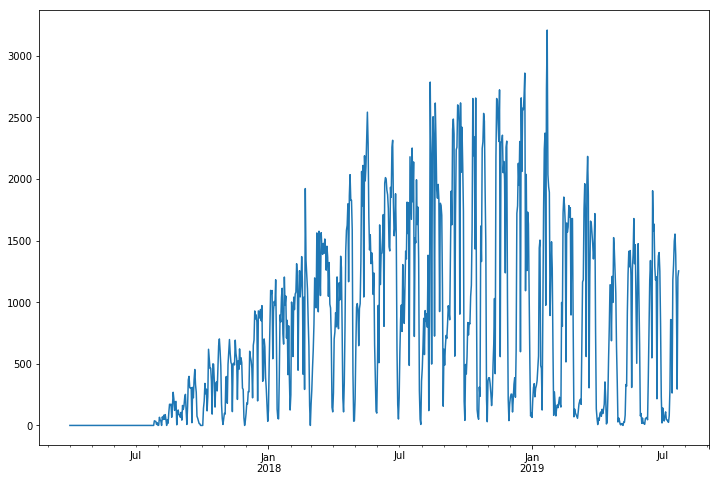

In [98]:
tm_df2['case_count'].plot(figsize=(12,8))

In [99]:
tm_df2.index

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10',
               ...
               '2019-07-14', '2019-07-15', '2019-07-16', '2019-07-17',
               '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21',
               '2019-07-22', '2019-07-23'],
              dtype='datetime64[ns]', length=844, freq='D')

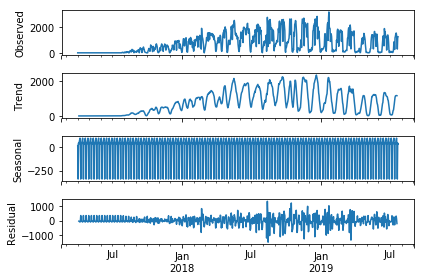

In [100]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

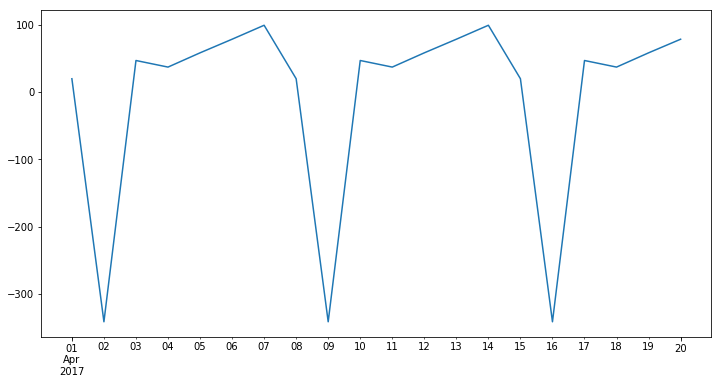

In [101]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

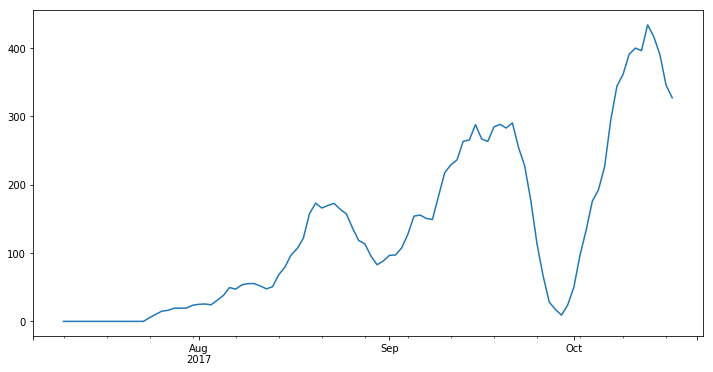

In [102]:
result.trend.iloc[100:200].plot(figsize=(12,6))

In [103]:
len(tm_df2)-90


754

In [104]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [105]:
train

case_count  Holiday  Sunday  test_holiday
2017-04-01         0.0      0.0       0             0
2017-04-02         0.0      0.0       1             1
2017-04-03         0.0      0.0       0             0
2017-04-04         0.0      0.0       0             0
2017-04-05         0.0      1.0       0             1
2017-04-06         0.0      0.0       0             0
2017-04-07         0.0      0.0       0             0
2017-04-08         0.0      0.0       0             0
2017-04-09         0.0      1.0       1             1
2017-04-10         0.0      0.0       0             0
2017-04-11         0.0      0.0       0             0
2017-04-12         0.0      0.0       0             0
2017-04-13         0.0      0.0       0             0
2017-04-14         0.0      1.0       0             1
2017-04-15         0.0      0.0       0             0
2017-04-16         0.0      0.0       1             1
2017-04-17         0.0      0.0       0             0
2017-04-18         0.0      0.0       0             0
2017-04-19         0.0      0.0       0             0
2017-04-20         0.0      0.0       0             0
2017-04-21         0.0      0.0       0             0
2017-04-22         0.0      0.0       0             0
2017-04-23         0.0      0.0       1             1
2017-04-24         0.0      0.0       0             0
2017-04-25         0.0      0.0       0             0
2017-04-26         0.0      0.0       0             0
2017-04-27         0.0      0.0       0             0
2017-04-28         0.0      0.0       0             0
2017-04-29         0.0      0.0       0             0
2017-04-30         0.0      0.0       1             1
...                ...      ...     ...           ...
2019-03-26      1476.0      0.0       0             0
2019-03-27      1351.0      0.0       0             0
2019-03-28      1460.0      0.0       0             0
2019-03-29      1719.0      0.0       0             0
2019-03-30       766.0      0.0       0             0
2019-03-31       135.0      0.0       1             1
2019-04-01        59.0      0.0       0             0
2019-04-02         7.0      0.0       0             0
2019-04-03        59.0      0.0       0             0
2019-04-04        41.0      0.0       0             0
2019-04-05        94.0      0.0       0             0
2019-04-06       109.0      1.0       0             1
2019-04-07        74.0      0.0       1             1
2019-04-08       131.0      0.0       0             0
2019-04-09        96.0      0.0       0             0
2019-04-10       130.0      0.0       0             0
2019-04-11       172.0      0.0       0             0
2019-04-12       353.0      0.0       0             0
2019-04-13       228.0      1.0       0             1
2019-04-14        12.0      0.0       1             1
2019-04-15        24.0      0.0       0             0
2019-04-16       222.0      0.0       0             0
2019-04-17       540.0      1.0       0             1
2019-04-18       800.0      0.0       0             0
2019-04-19      1141.0      1.0       0             1
2019-04-20      1140.0      0.0       0             0
2019-04-21       687.0      0.0       1             1
2019-04-22      1210.0      0.0       0             0
2019-04-23       998.0      0.0       0             0
2019-04-24      1524.0      0.0       0             0

[754 rows x 4 columns]

In [106]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=15,trace=True).summary()

In [107]:
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(3,1,3),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(3, 1, 3)x(2, 0, 1, 15)   Log Likelihood               -5524.602
Date:                            Sun, 26 Jan 2020   AIC                          11071.204
Time:                                    20:20:14   BIC                          11122.068
Sample:                                04-01-2017   HQIC                         11090.799
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday  -329.2533     31.748    -10.371      0.000    -391.479    -267.028
ar.L1           -0.4897      0.039    -12.511      0.000      -0.566      -0.413
ar.L2           -0.2115      0.044     -4.764      0.000      -0.299      -0.124
ar.L3            0.5639      0.038     14.830      0.000       0.489       0.638
ma.L1            0.1683      0.019      8.936      0.000       0.131       0.205
ma.L2           -0.1358      0.019     -7.188      0.000      -0.173      -0.099
ma.L3           -0.9488      0.018    -51.390      0.000      -0.985      -0.913
ar.S.L15        -0.7241      0.073     -9.937      0.000      -0.867      -0.581
ar.S.L30         0.1629      0.045      3.590      0.000       0.074       0.252
ma.S.L15         0.7296      0.065     11.144      0.000       0.601       0.858
sigma2        1.562e+05   7491.665     20.849      0.000    1.42e+05    1.71e+05
===================================================================================
Ljung-Box (Q):                      203.86   Jarque-Bera (JB):               264.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.81   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
start=len(train)
end=len(train)+len(test)-1

In [109]:

predictions_assam=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

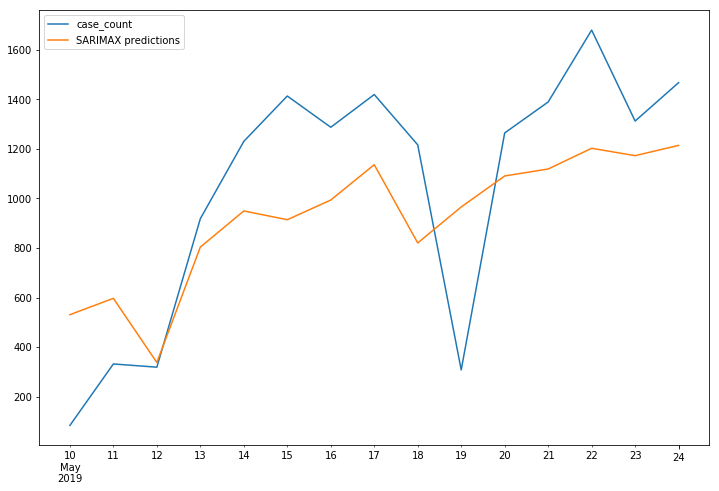

In [110]:
test['case_count'][15:30].plot(figsize=(12,8),legend=True)
predictions_assam[15:30].plot(legend=True)

In [111]:
from statsmodels.tools.eval_measures import rmse

In [112]:
error=rmse(test['case_count'],predictions_assam)
error

359.72762165760037

In [113]:
predictions_assam.mean()

740.2471629008091

In [114]:
test['case_count'].mean()

679.9666666666667

In [115]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(3,1,3),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
fcast_assam=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [116]:
fcast_assam

2019-07-24    1183.435120
2019-07-25    1164.062795
2019-07-26    1008.391322
2019-07-27     950.934470
2019-07-28     340.390668
2019-07-29     506.395401
2019-07-30     532.004007
2019-07-31     399.472078
2019-08-01     329.149122
2019-08-02     343.093619
2019-08-03     388.195112
2019-08-04     114.705067
2019-08-05     333.313853
2019-08-06     430.401221
2019-08-07     441.246287
2019-08-08     412.784164
2019-08-09     469.017271
2019-08-10     501.377581
2019-08-11     342.077582
2019-08-12     535.632541
2019-08-13     907.149722
2019-08-14    1037.859530
2019-08-15     748.957668
2019-08-16    1195.655784
2019-08-17    1203.466760
2019-08-18     760.733693
2019-08-19    1067.745906
2019-08-20    1049.506161
2019-08-21    1064.434383
2019-08-22    1093.655966
                 ...     
2019-09-25     829.844452
2019-09-26     685.843870
2019-09-27     626.722615
2019-09-28     553.985930
2019-09-29     182.821657
2019-09-30     420.095308
2019-10-01     428.839377
2019-10-02  

In [117]:
df[(df['segment']==2)]['state'].unique()

array(['ASSAM', 'BIHAR', 'CHHATTISGARH', 'GUJARAT', 'HARYANA',
       'JHARKHAND', 'KERALA', 'KARNATAKA', 'MAHARASHTRA',
       'MADHYA PRADESH', 'ORISSA', 'PUNJAB', 'TAMIL NADU', 'TRIPURA',
       'UTTAR PRADESH', 'WEST BENGAL'], dtype=object)

In [118]:
seg2_data=df[(df['segment']==2) & (df['state']=='BIHAR')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})

In [119]:
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

In [120]:
tm_df2.tail()

case_count  Holiday  Sunday  test_holiday
2019-07-19      6285.0      0.0       0             0
2019-07-20      5686.0      0.0       0             0
2019-07-21      2982.0      0.0       1             1
2019-07-22      5589.0      0.0       0             0
2019-07-23      6180.0      0.0       0             0

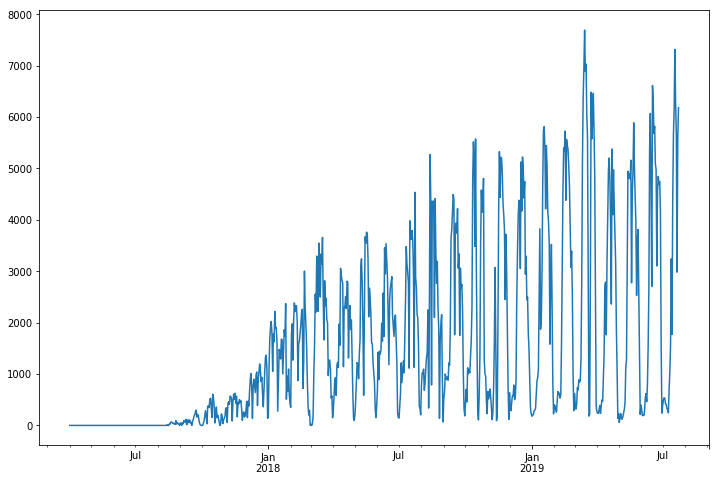

In [121]:
tm_df2['case_count'].plot(figsize=(12,8))

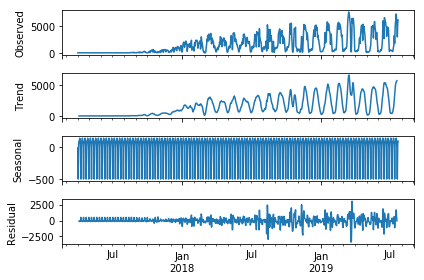

In [122]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

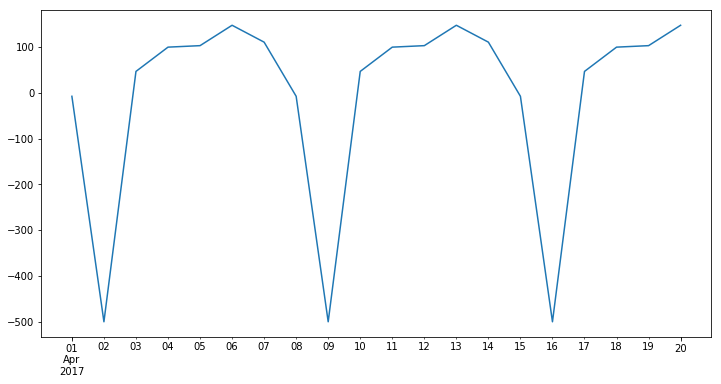

In [123]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

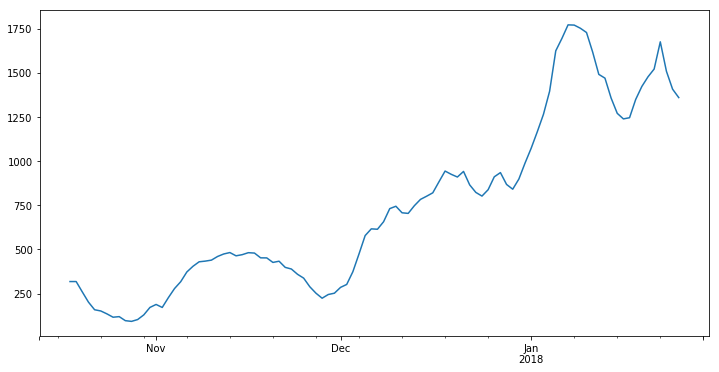

In [124]:
result.trend.iloc[200:300].plot(figsize=(12,6))

In [125]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [126]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=60,trace=True).summary()

In [127]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(2,1,2),seasonal_order=(1,0,2,15),enforce_invertibility=False)
result2=model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 15)   Log Likelihood               -5955.659
Date:                            Sun, 26 Jan 2020   AIC                          11929.319
Time:                                    20:20:48   BIC                          11970.935
Sample:                                04-01-2017   HQIC                         11945.351
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday  -443.1033     43.885    -10.097      0.000    -529.116    -357.090
ar.L1           -0.1803      0.101     -1.792      0.073      -0.377       0.017
ar.L2            0.7022      0.083      8.409      0.000       0.539       0.866
ma.L1           -0.0332      0.093     -0.358      0.720      -0.215       0.149
ma.L2           -0.9306      0.091    -10.193      0.000      -1.110      -0.752
ar.S.L15        -0.9141      0.041    -22.469      0.000      -0.994      -0.834
ma.S.L15         0.8851      0.063     14.156      0.000       0.763       1.008
ma.S.L30         0.1128      0.042      2.665      0.008       0.030       0.196
sigma2        4.891e+05   1.78e+04     27.426      0.000    4.54e+05    5.24e+05
===================================================================================
Ljung-Box (Q):                      120.82   Jarque-Bera (JB):               870.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              17.54   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
start=len(train)
end=len(train)+len(test)-1
predictions_Bihar=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

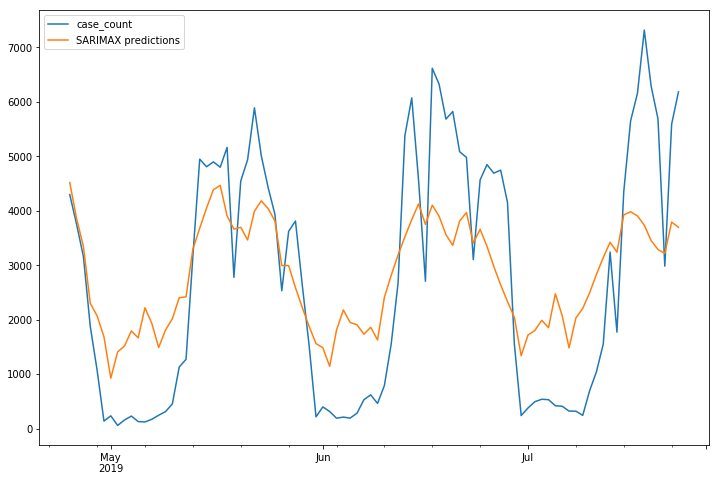

In [129]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_Bihar.plot(legend=True)

In [130]:
error=rmse(test['case_count'],predictions_Bihar)
error

1478.2853518440352

In [131]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(2,1,2),seasonal_order=(1,0,2,15),enforce_invertibility=False)
result2=model.fit()
fcast_Bihar=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [132]:
fcast_Bihar

2019-07-24    6315.596360
2019-07-25    6013.459523
2019-07-26    5857.525186
2019-07-27    5679.481601
2019-07-28    4464.301307
2019-07-29    4623.519170
2019-07-30    4461.371656
2019-07-31    4423.347703
2019-08-01    4278.281715
2019-08-02    4311.201102
2019-08-03    4486.569532
2019-08-04    4038.823106
2019-08-05    4351.551938
2019-08-06    4475.637049
2019-08-07    4569.917634
2019-08-08    4551.327104
2019-08-09    4786.010272
2019-08-10    4897.792326
2019-08-11    4684.821692
2019-08-12    5320.185124
2019-08-13    6037.577160
2019-08-14    6369.477426
2019-08-15    5948.277524
2019-08-16    6658.388590
2019-08-17    6695.492434
2019-08-18    5962.908979
2019-08-19    6432.719128
2019-08-20    6334.800618
2019-08-21    6427.215851
2019-08-22    6419.765900
                 ...     
2019-09-25    5804.433389
2019-09-26    5370.275114
2019-09-27    5169.364192
2019-09-28    4968.533930
2019-09-29    4425.361581
2019-09-30    4738.002044
2019-10-01    4740.413856
2019-10-02  

In [133]:
seg2_data=df[(df['segment']==2) & (df['state']=='CHHATTISGARH')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})

In [134]:
seg2_data=df[(df['segment']==2) & (df['state']=='CHHATTISGARH')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

In [135]:
tm_df2.tail()

case_count  Holiday  Sunday  test_holiday
2019-07-19       493.0      0.0       0             0
2019-07-20       372.0      0.0       0             0
2019-07-21       231.0      0.0       1             1
2019-07-22       443.0      0.0       0             0
2019-07-23       518.0      0.0       0             0

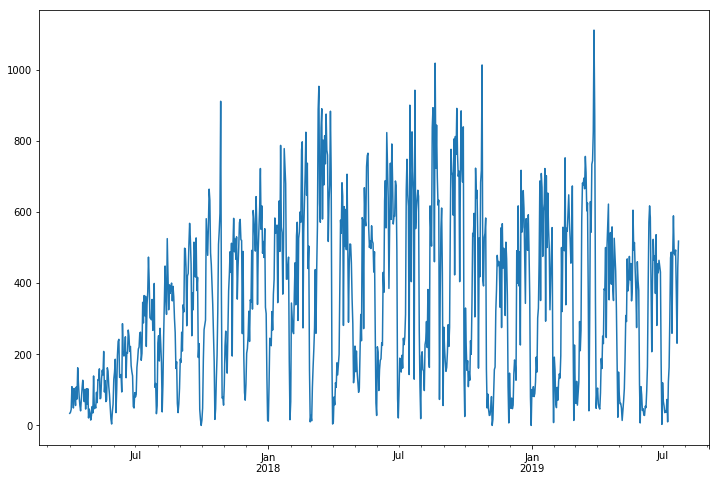

In [136]:
tm_df2['case_count'].plot(figsize=(12,8))

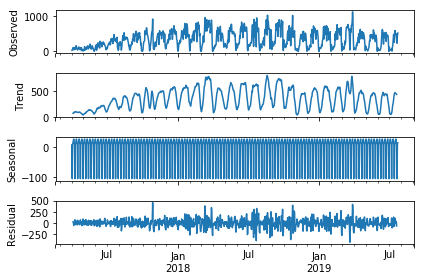

In [137]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

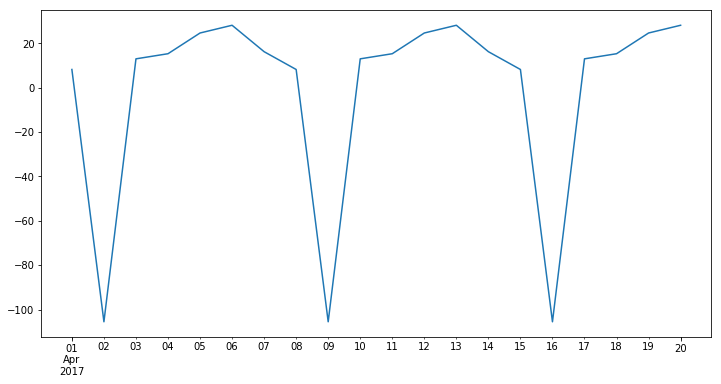

In [138]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

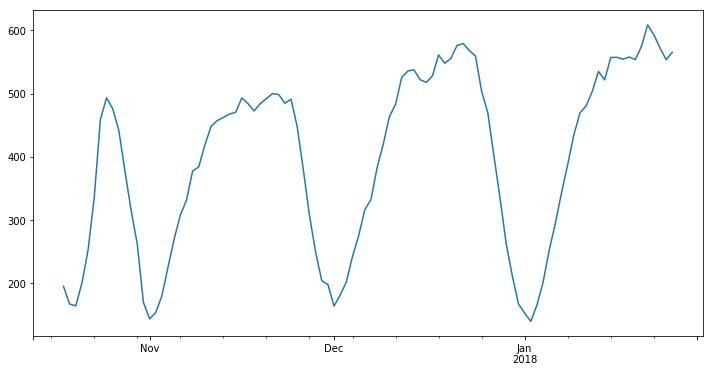

In [139]:
result.trend.iloc[200:300].plot(figsize=(12,6))

In [140]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [141]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=15,trace=True).summary()

In [142]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(3,1,3),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(3, 1, 3)x(2, 0, 1, 15)   Log Likelihood               -4756.082
Date:                            Sun, 26 Jan 2020   AIC                           9534.164
Time:                                    20:21:27   BIC                           9585.028
Sample:                                04-01-2017   HQIC                          9553.759
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday   -94.7675     11.839     -8.005      0.000    -117.971     -71.564
ar.L1           -0.8336      0.073    -11.497      0.000      -0.976      -0.691
ar.L2           -0.1200      0.074     -1.620      0.105      -0.265       0.025
ar.L3            0.5111      0.051     10.084      0.000       0.412       0.610
ma.L1            0.3910      0.069      5.704      0.000       0.257       0.525
ma.L2           -0.4162      0.054     -7.771      0.000      -0.521      -0.311
ma.L3           -0.8868      0.058    -15.311      0.000      -1.000      -0.773
ar.S.L15        -0.6964      0.076     -9.201      0.000      -0.845      -0.548
ar.S.L30         0.1907      0.053      3.579      0.000       0.086       0.295
ma.S.L15         0.6643      0.071      9.365      0.000       0.525       0.803
sigma2        2.058e+04   1044.670     19.703      0.000    1.85e+04    2.26e+04
===================================================================================
Ljung-Box (Q):                       87.04   Jarque-Bera (JB):                59.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [143]:
start=len(train)
end=len(train)+len(test)-1
predictions_CHHATTISGARH=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

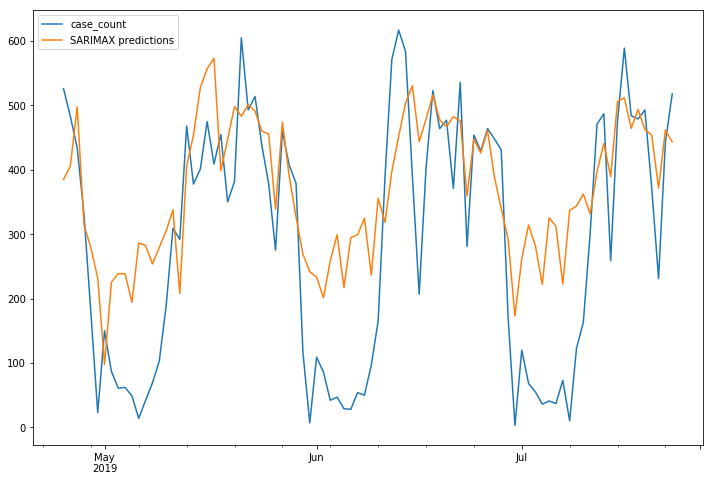

In [144]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_CHHATTISGARH.plot(legend=True)

In [145]:
error=rmse(test['case_count'],predictions_CHHATTISGARH)
error

144.29859743033276

In [146]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(3,1,3),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
fcast_CHHATTISGARH=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [147]:
fcast_CHHATTISGARH

2019-07-24    459.327723
2019-07-25    421.793700
2019-07-26    391.416033
2019-07-27    325.259607
2019-07-28    202.107478
2019-07-29    194.558816
2019-07-30    196.006359
2019-07-31    215.732858
2019-08-01    201.482273
2019-08-02    164.961249
2019-08-03    205.192227
2019-08-04     80.893926
2019-08-05    183.042087
2019-08-06    190.086848
2019-08-07    194.841008
2019-08-08    223.446963
2019-08-09    246.141391
2019-08-10    284.752503
2019-08-11    267.136598
2019-08-12    290.046884
2019-08-13    419.613554
2019-08-14    443.744943
2019-08-15    359.074728
2019-08-16    439.897256
2019-08-17    463.176565
2019-08-18    346.960135
2019-08-19    436.259907
2019-08-20    419.284591
2019-08-21    438.057236
2019-08-22    450.186132
                 ...    
2019-09-25    299.152811
2019-09-26    280.291663
2019-09-27    242.801790
2019-09-28    227.827620
2019-09-29    134.975097
2019-09-30    231.005493
2019-10-01    211.429703
2019-10-02    232.465455
2019-10-03    229.272109


In [148]:
seg2_data=df[(df['segment']==2) & (df['state']=='GUJARAT')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

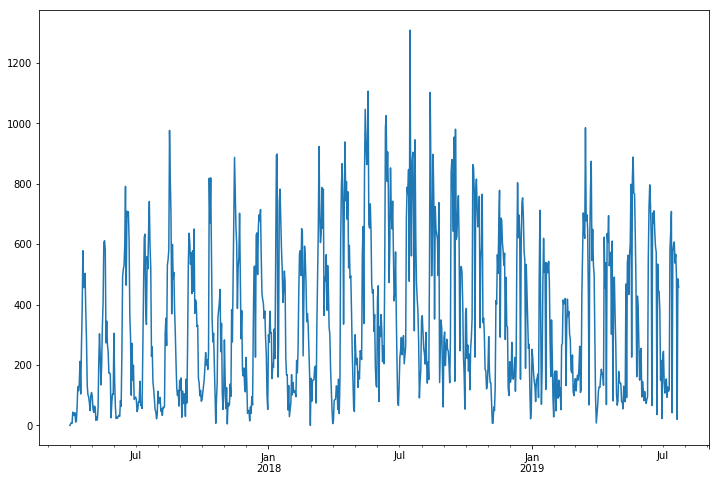

In [149]:
tm_df2['case_count'].plot(figsize=(12,8))

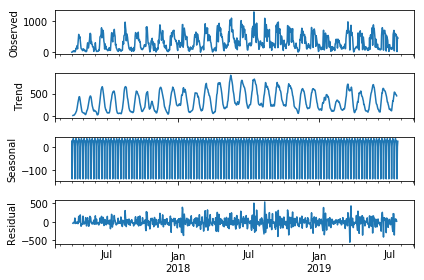

In [150]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

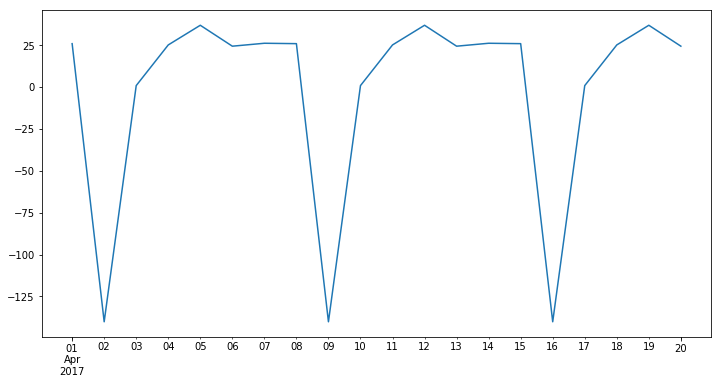

In [151]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

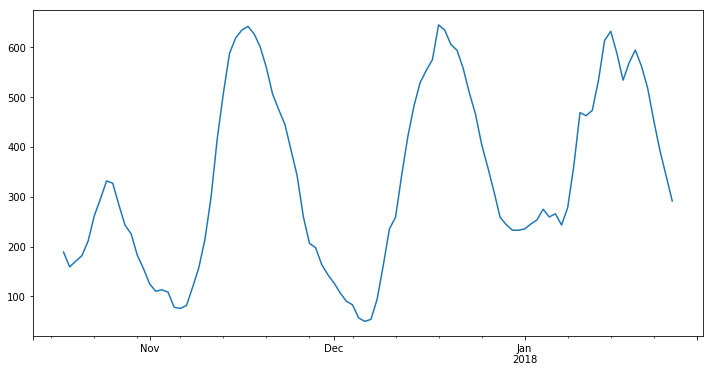

In [152]:
result.trend.iloc[200:300].plot(figsize=(12,6))

In [153]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [154]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=15,trace=True).summary()

In [155]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(2,1,2),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(2, 1, 2)x(2, 0, 1, 15)   Log Likelihood               -4812.383
Date:                            Sun, 26 Jan 2020   AIC                           9642.765
Time:                                    20:22:17   BIC                           9684.382
Sample:                                04-01-2017   HQIC                          9658.798
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday  -106.4926     11.728     -9.080      0.000    -129.480     -83.506
ar.L1            1.1390      0.219      5.202      0.000       0.710       1.568
ar.L2           -0.2652      0.125     -2.116      0.034      -0.511      -0.020
ma.L1           -1.6397      0.213     -7.707      0.000      -2.057      -1.223
ma.L2            0.6452      0.208      3.098      0.002       0.237       1.053
ar.S.L15        -0.8329      0.067    -12.397      0.000      -0.965      -0.701
ar.S.L30         0.1204      0.055      2.183      0.029       0.012       0.228
ma.S.L15         0.7855      0.046     16.905      0.000       0.694       0.877
sigma2        2.245e+04   1100.369     20.400      0.000    2.03e+04    2.46e+04
===================================================================================
Ljung-Box (Q):                       85.45   Jarque-Bera (JB):                96.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
start=len(train)
end=len(train)+len(test)-1
predictions_GUJARAT=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

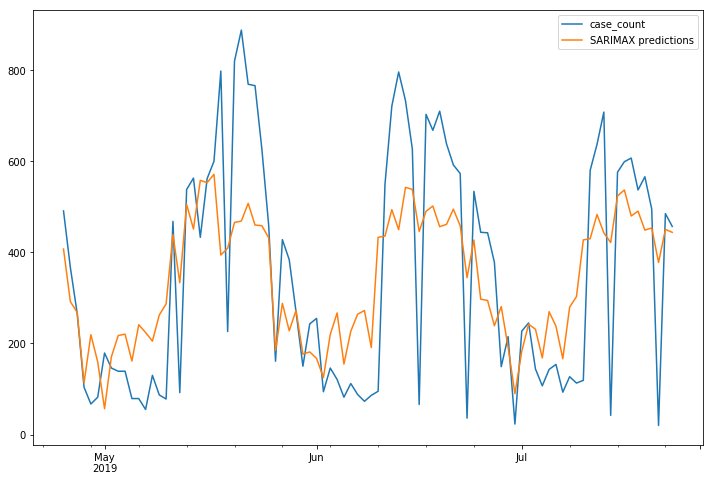

In [157]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_GUJARAT.plot(legend=True)

In [158]:
error=rmse(test['case_count'],predictions_GUJARAT)
error

172.2894677500903

In [159]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(2,1,2),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
fcast_GUJARAT=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [160]:
fcast_GUJARAT

2019-07-24    462.438635
2019-07-25    363.102725
2019-07-26    313.369686
2019-07-27    231.341970
2019-07-28     61.457967
2019-07-29    200.125252
2019-07-30    193.149989
2019-07-31    244.077039
2019-08-01    176.766692
2019-08-02    202.235040
2019-08-03    188.126503
2019-08-04     65.640340
2019-08-05    199.821878
2019-08-06    208.222721
2019-08-07    254.953845
2019-08-08    234.727236
2019-08-09    319.641159
2019-08-10    415.597416
2019-08-11    375.748955
2019-08-12    429.554800
2019-08-13    472.274534
2019-08-14    525.659638
2019-08-15    368.007135
2019-08-16    545.077803
2019-08-17    516.570140
2019-08-18    413.865706
2019-08-19    528.316518
2019-08-20    475.917419
2019-08-21    507.415098
2019-08-22    465.071043
                 ...    
2019-09-25    248.495573
2019-09-26    201.410131
2019-09-27    262.998548
2019-09-28    220.278438
2019-09-29    137.504716
2019-09-30    203.509799
2019-10-01    228.332859
2019-10-02    214.676888
2019-10-03    217.429469


In [161]:
seg2_data=df[(df['segment']==2) & (df['state']=='JHARKHAND')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

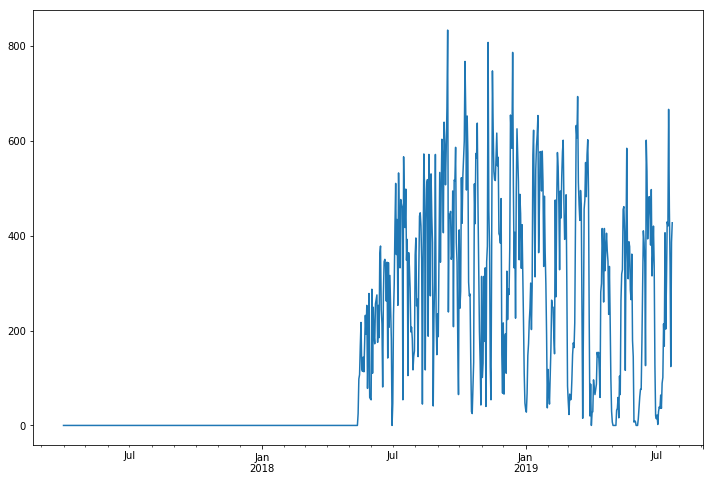

In [162]:
tm_df2['case_count'].plot(figsize=(12,8))

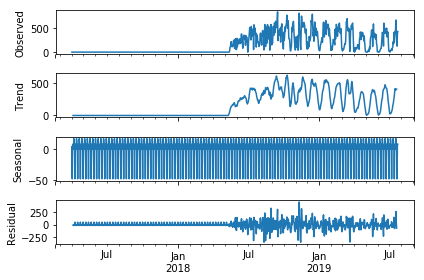

In [163]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

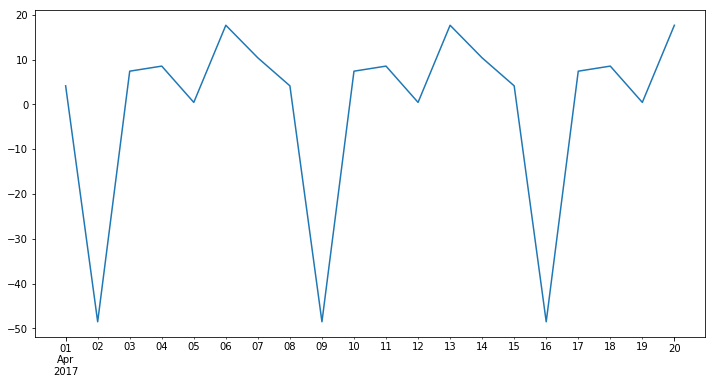

In [164]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

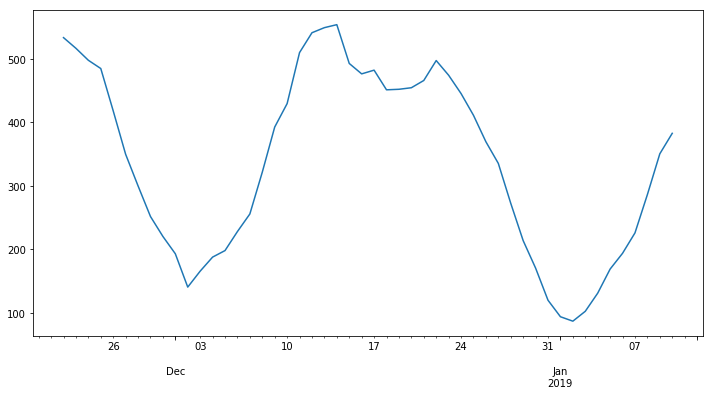

In [165]:
result.trend.iloc[600:650].plot(figsize=(12,6))

In [166]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [167]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=60,trace=True).summary()

In [168]:
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(3,1,3),seasonal_order=(2,0,2,30),enforce_invertibility=False)
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(3, 1, 3)x(2, 0, 2, 30)   Log Likelihood               -4439.617
Date:                            Sun, 26 Jan 2020   AIC                           8903.233
Time:                                    20:23:34   BIC                           8958.722
Sample:                                04-01-2017   HQIC                          8924.610
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday   -51.1412      8.168     -6.261      0.000     -67.150     -35.132
ar.L1           -1.1397      0.026    -44.520      0.000      -1.190      -1.090
ar.L2            0.1381      0.046      3.024      0.002       0.049       0.228
ar.L3            0.6313      0.026     24.496      0.000       0.581       0.682
ma.L1            0.8042      0.012     66.735      0.000       0.781       0.828
ma.L2           -0.7015      0.018    -39.202      0.000      -0.737      -0.666
ma.L3           -0.9503      0.011    -85.103      0.000      -0.972      -0.928
ar.S.L30         1.3238      1.440      0.919      0.358      -1.499       4.147
ar.S.L60        -0.5031      0.975     -0.516      0.606      -2.414       1.408
ma.S.L30        -1.2177      1.433     -0.850      0.395      -4.026       1.591
ma.S.L60         0.4490      0.805      0.558      0.577      -1.128       2.026
sigma2        8363.4643    331.448     25.233      0.000    7713.838    9013.090
===================================================================================
Ljung-Box (Q):                      132.83   Jarque-Bera (JB):               433.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              30.28   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
start=len(train)
end=len(train)+len(test)-1
predictions_JHARKHAND=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

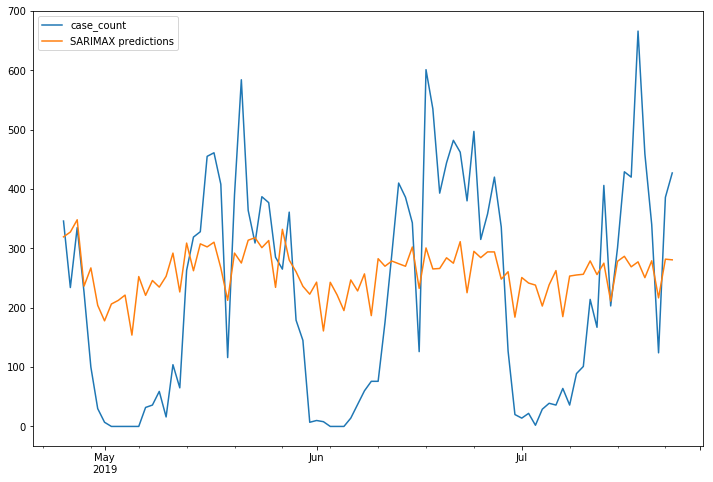

In [170]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_JHARKHAND.plot(legend=True)

In [171]:
error=rmse(test['case_count'],predictions_JHARKHAND)
error

163.36167058535804

In [172]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(3,1,3),seasonal_order=(2,0,2,30),enforce_invertibility=False)
result2=model.fit()
fcast_JHARKHAND=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [173]:
fcast_JHARKHAND

2019-07-24    396.632038
2019-07-25    347.043348
2019-07-26    332.056734
2019-07-27    329.987585
2019-07-28    229.077205
2019-07-29    245.986074
2019-07-30    223.057319
2019-07-31    212.552797
2019-08-01    214.431431
2019-08-02    206.643975
2019-08-03    217.085125
2019-08-04    162.881021
2019-08-05    212.776514
2019-08-06    223.856730
2019-08-07    217.045899
2019-08-08    230.467238
2019-08-09    231.348875
2019-08-10    254.317362
2019-08-11    208.627909
2019-08-12    245.790330
2019-08-13    283.485682
2019-08-14    289.987384
2019-08-15    240.003930
2019-08-16    325.156860
2019-08-17    335.334074
2019-08-18    254.749699
2019-08-19    305.439249
2019-08-20    285.562699
2019-08-21    306.634350
2019-08-22    310.926319
                 ...    
2019-09-25    285.208742
2019-09-26    269.517992
2019-09-27    255.232405
2019-09-28    247.967658
2019-09-29    190.439333
2019-09-30    245.629033
2019-10-01    242.727905
2019-10-02    248.035279
2019-10-03    247.223523


In [174]:
seg2_data=df[(df['segment']==2) & (df['state']=='KERALA')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

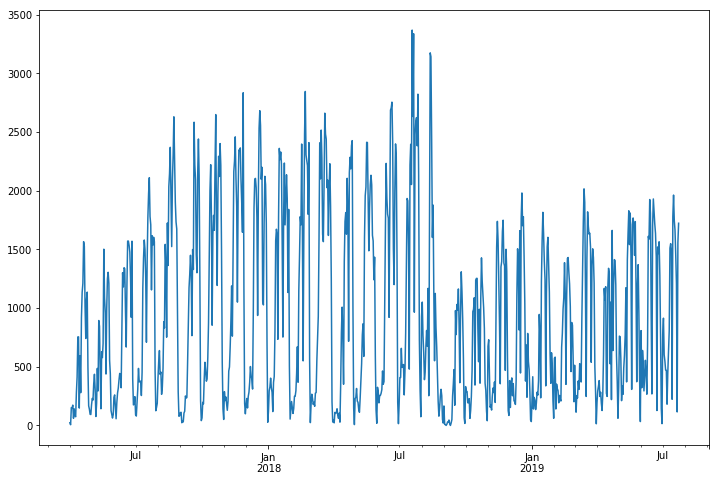

In [175]:
tm_df2['case_count'].plot(figsize=(12,8))

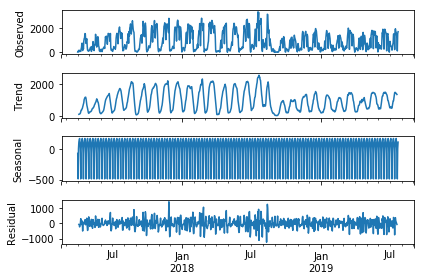

In [176]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

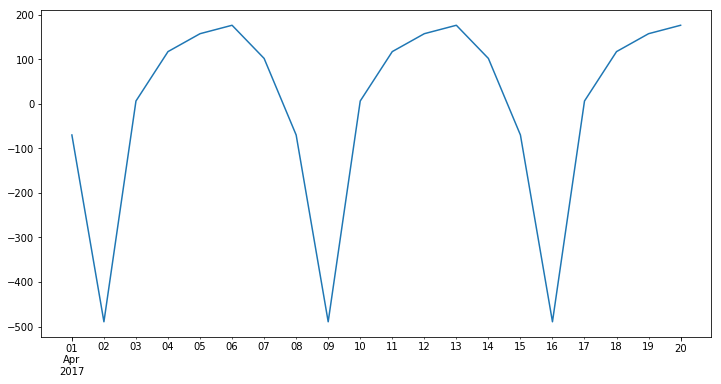

In [177]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

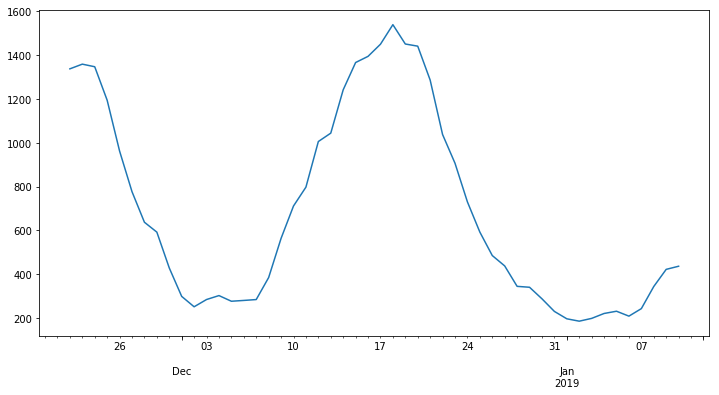

In [178]:
result.trend.iloc[600:650].plot(figsize=(12,6))

In [179]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [180]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=15,trace=True).summary()

In [181]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,0,1),seasonal_order=(1,0,1,15),enforce_invertibility=False)
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 15)   Log Likelihood               -5643.266
Date:                            Sun, 26 Jan 2020   AIC                          11298.532
Time:                                    20:24:46   BIC                          11326.285
Sample:                                04-01-2017   HQIC                         11309.223
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday  -589.7733     36.687    -16.076      0.000    -661.678    -517.868
ar.L1            0.9995      0.001   1061.507      0.000       0.998       1.001
ma.L1           -0.3204      0.042     -7.629      0.000      -0.403      -0.238
ar.S.L15        -0.9865      0.015    -65.157      0.000      -1.016      -0.957
ma.S.L15         0.9221      0.035     26.039      0.000       0.853       0.991
sigma2        2.471e+05    1.5e+04     16.511      0.000    2.18e+05    2.76e+05
===================================================================================
Ljung-Box (Q):                      151.92   Jarque-Bera (JB):                73.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.38
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [182]:
start=len(train)
end=len(train)+len(test)-1
predictions_KERALA=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

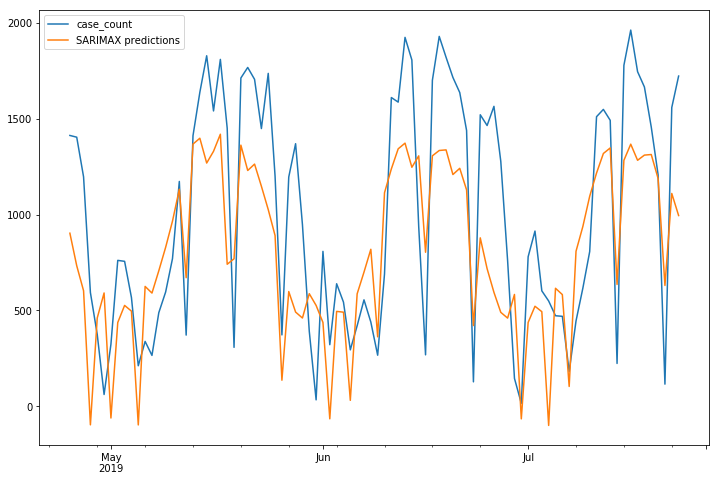

In [183]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_KERALA.plot(legend=True)

In [184]:
error=rmse(test['case_count'],predictions_KERALA)
error

427.71725970304914

In [185]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(1,0,1),seasonal_order=(1,0,1,15),enforce_invertibility=False)
result2=model.fit()
fcast_KERALA=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [186]:
fcast_KERALA

2019-07-24    1498.120773
2019-07-25    1356.051471
2019-07-26    1205.497580
2019-07-27    1109.274259
2019-07-28     578.913467
2019-07-29     971.742234
2019-07-30     953.357818
2019-07-31     876.352081
2019-08-01     886.694855
2019-08-02     860.739286
2019-08-03     850.233764
2019-08-04     418.301086
2019-08-05     884.707226
2019-08-06     935.897263
2019-08-07    1009.918189
2019-08-08    1051.192322
2019-08-09    1085.438479
2019-08-10    1132.695960
2019-08-11     684.181739
2019-08-12     673.994306
2019-08-13    1082.351525
2019-08-14    1014.020749
2019-08-15     561.967092
2019-08-16     918.025520
2019-08-17     867.777506
2019-08-18     359.430527
2019-08-19     721.532163
2019-08-20     634.152493
2019-08-21     518.978168
2019-08-22     383.722626
                 ...     
2019-09-25    -247.988826
2019-09-26    -274.845524
2019-09-27    -272.944718
2019-09-28    -238.928416
2019-09-29    -711.193920
2019-09-30    -207.093710
2019-10-01    -186.937924
2019-10-02  

In [187]:
seg2_data=df[(df['segment']==2) & (df['state']=='KARNATAKA')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

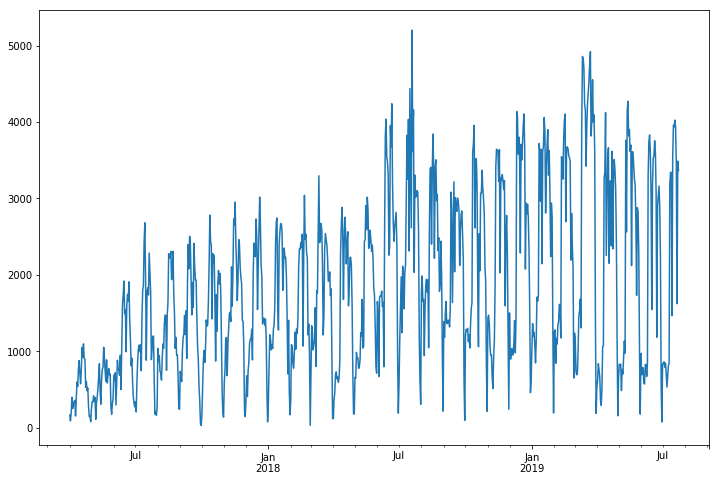

In [188]:
tm_df2['case_count'].plot(figsize=(12,8))

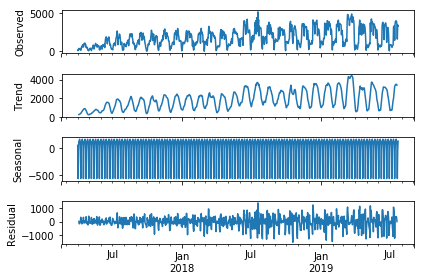

In [189]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

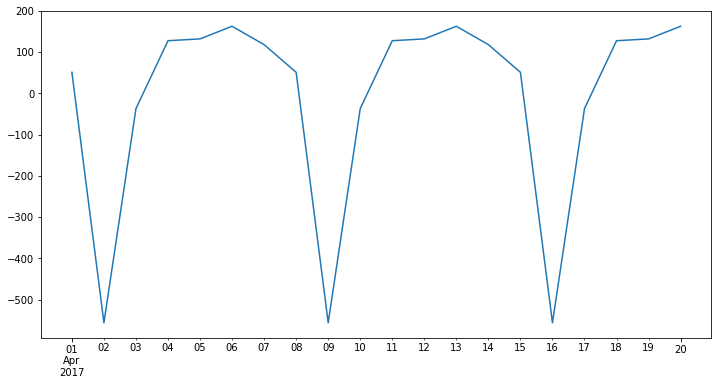

In [190]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

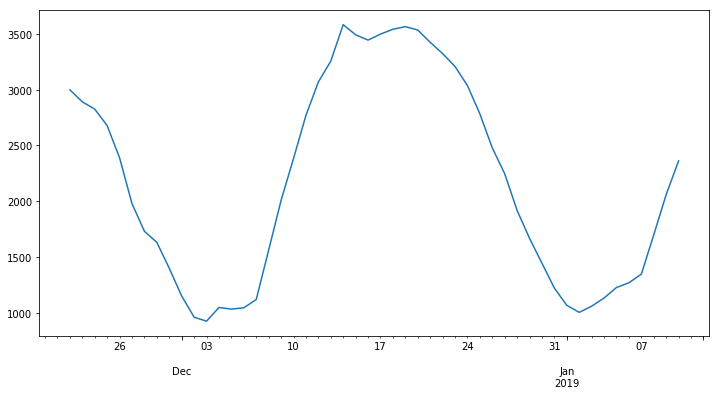

In [191]:
result.trend.iloc[600:650].plot(figsize=(12,6))

In [192]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [193]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=15,trace=True).summary()

In [194]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,1),seasonal_order=(1,0,2,15),enforce_invertibility=False)
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(1, 1, 1)x(1, 0, 2, 15)   Log Likelihood               -5736.868
Date:                            Sun, 26 Jan 2020   AIC                          11487.736
Time:                                    20:25:02   BIC                          11520.104
Sample:                                04-01-2017   HQIC                         11500.206
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday  -409.4611     33.172    -12.343      0.000    -474.478    -344.444
ar.L1            0.5736      0.030     19.389      0.000       0.516       0.632
ma.L1           -0.9679      0.009   -106.163      0.000      -0.986      -0.950
ar.S.L15        -0.9598      0.016    -61.361      0.000      -0.991      -0.929
ma.S.L15         0.9467      0.038     24.783      0.000       0.872       1.022
ma.S.L30         0.1700      0.033      5.164      0.000       0.105       0.234
sigma2        2.387e+05   9695.975     24.617      0.000     2.2e+05    2.58e+05
===================================================================================
Ljung-Box (Q):                       89.93   Jarque-Bera (JB):               118.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.28   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [195]:
start=len(train)
end=len(train)+len(test)-1
predictions_KARNATAKA=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

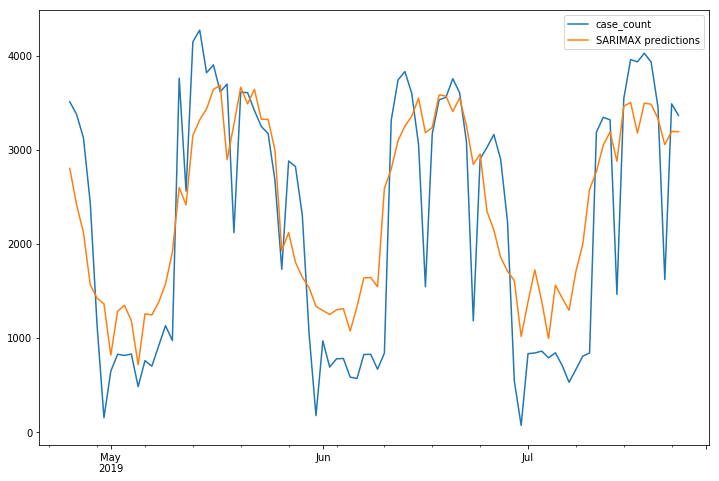

In [196]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_KARNATAKA.plot(legend=True)

In [197]:
error=rmse(test['case_count'],predictions_KARNATAKA)
error

742.1188903677552

In [198]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(1,1,1),seasonal_order=(1,0,2,15),enforce_invertibility=False)
result2=model.fit()
fcast_KARNATAKA=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [199]:
seg2_data=df[(df['segment']==2) & (df['state']=='MAHARASHTRA')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

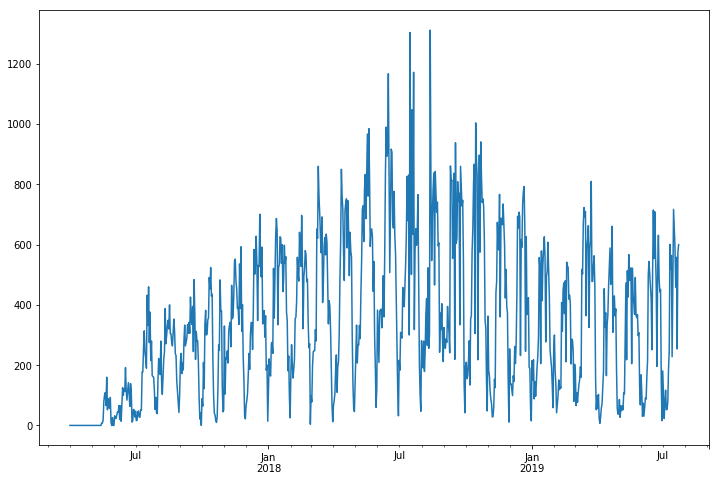

In [200]:
tm_df2['case_count'].plot(figsize=(12,8))

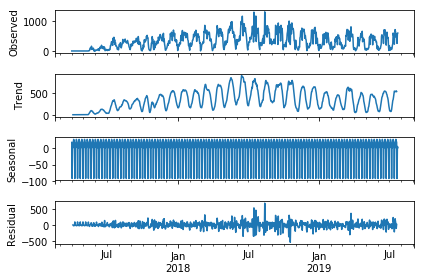

In [201]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

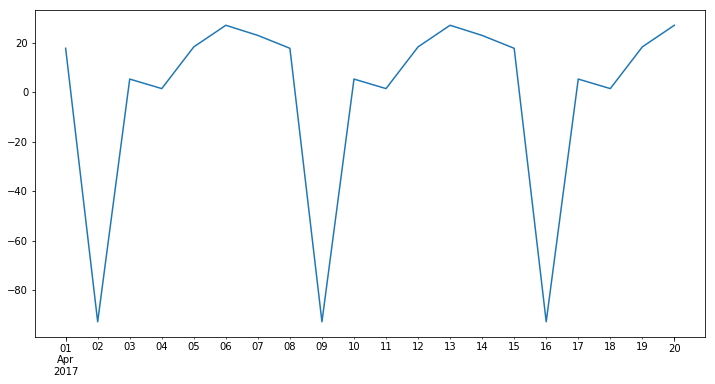

In [202]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

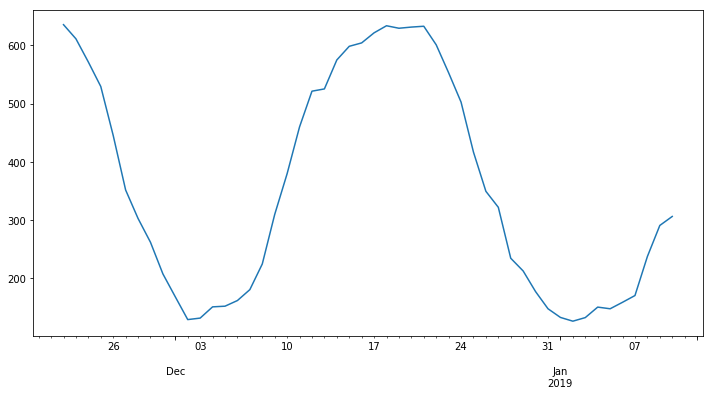

In [203]:
result.trend.iloc[600:650].plot(figsize=(12,6))

In [204]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [205]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=15,trace=True).summary()

In [206]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(2,1,3),seasonal_order=(1,0,2,15),enforce_invertibility=False)
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(2, 1, 3)x(1, 0, 2, 15)   Log Likelihood               -4738.497
Date:                            Sun, 26 Jan 2020   AIC                           9496.994
Time:                                    20:25:36   BIC                           9543.234
Sample:                                04-01-2017   HQIC                          9514.808
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday   -80.6491     11.321     -7.124      0.000    -102.839     -58.460
ar.L1           -0.7284      1.655     -0.440      0.660      -3.973       2.516
ar.L2            0.2026      1.557      0.130      0.896      -2.849       3.255
ma.L1            0.1719      1.661      0.103      0.918      -3.084       3.428
ma.L2           -0.7131      0.621     -1.149      0.251      -1.930       0.503
ma.L3            0.1119      1.036      0.108      0.914      -1.918       2.142
ar.S.L15        -0.9283      0.026    -36.168      0.000      -0.979      -0.878
ma.S.L15         0.8450      0.046     18.515      0.000       0.756       0.934
ma.S.L30         0.1198      0.037      3.276      0.001       0.048       0.191
sigma2        1.956e+04    827.754     23.629      0.000    1.79e+04    2.12e+04
===================================================================================
Ljung-Box (Q):                      124.38   Jarque-Bera (JB):               412.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.02   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [207]:
start=len(train)
end=len(train)+len(test)-1
predictions_MAHARASHTRA=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

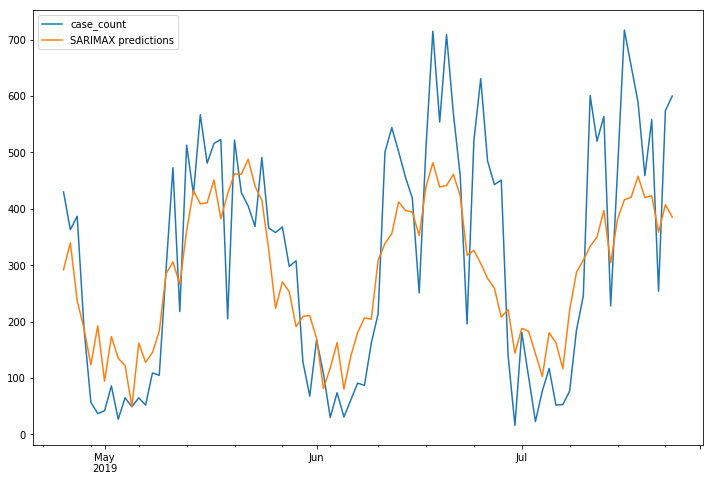

In [208]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_MAHARASHTRA.plot(legend=True)

In [209]:
error=rmse(test['case_count'],predictions_MAHARASHTRA)
error

127.90163527699917

In [210]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(2,1,3),seasonal_order=(1,0,2,15),enforce_invertibility=False)
result2=model.fit()
fcast_MAHARASHTRA=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [211]:
seg2_data=df[(df['segment']==2) & (df['state']=='MADHYA PRADESH')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

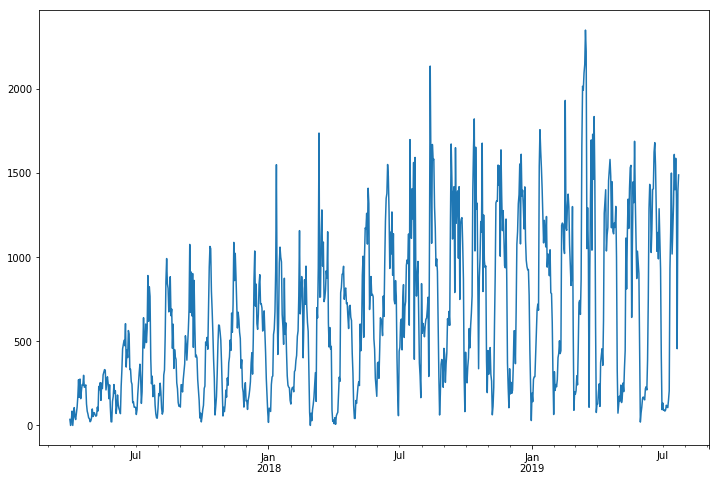

In [212]:
tm_df2['case_count'].plot(figsize=(12,8))

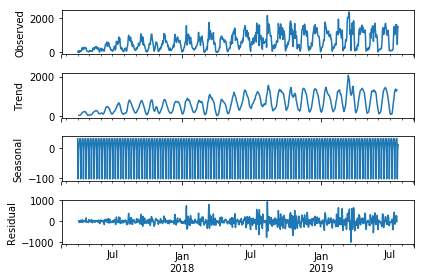

In [213]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

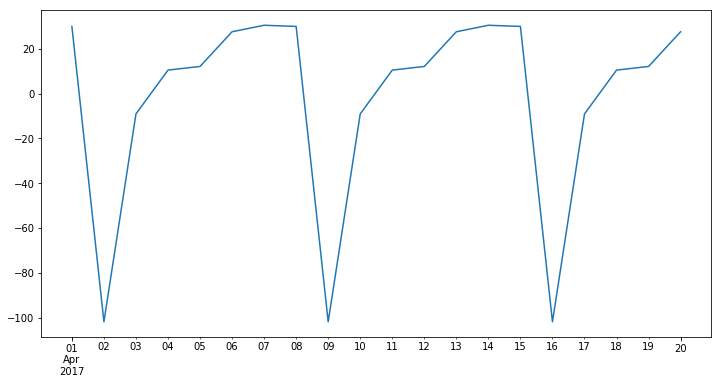

In [214]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

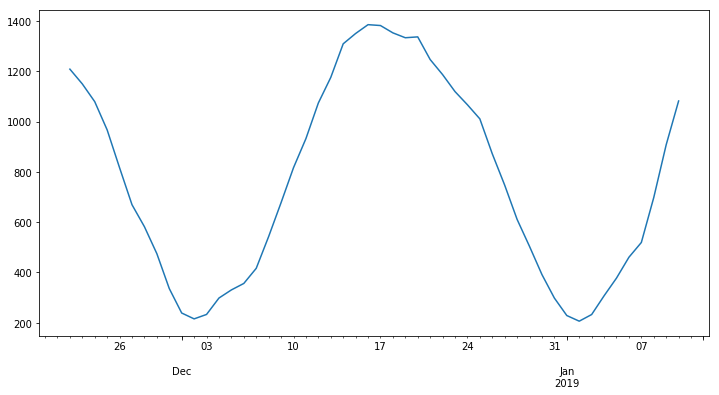

In [215]:
result.trend.iloc[600:650].plot(figsize=(12,6))

In [216]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [217]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=15,trace=True).summary()

In [218]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(4,1,1),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(4, 1, 1)x(2, 0, 1, 15)   Log Likelihood               -5131.300
Date:                            Sun, 26 Jan 2020   AIC                          10282.601
Time:                                    20:26:16   BIC                          10328.841
Sample:                                04-01-2017   HQIC                         10300.415
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday  -108.8222     17.417     -6.248      0.000    -142.960     -74.685
ar.L1            0.5185      0.031     16.728      0.000       0.458       0.579
ar.L2            0.1851      0.037      4.991      0.000       0.112       0.258
ar.L3           -0.0023      0.039     -0.060      0.952      -0.078       0.074
ar.L4           -0.0431      0.031     -1.398      0.162      -0.104       0.017
ma.L1           -0.9779      0.012    -80.359      0.000      -1.002      -0.954
ar.S.L15        -0.8162      0.059    -13.741      0.000      -0.933      -0.700
ar.S.L30         0.1331      0.047      2.818      0.005       0.041       0.226
ma.S.L15         0.8043      0.048     16.648      0.000       0.710       0.899
sigma2        5.417e+04   2271.367     23.849      0.000    4.97e+04    5.86e+04
===================================================================================
Ljung-Box (Q):                       75.38   Jarque-Bera (JB):               297.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.35   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [219]:
start=len(train)
end=len(train)+len(test)-1
predictions_MP=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

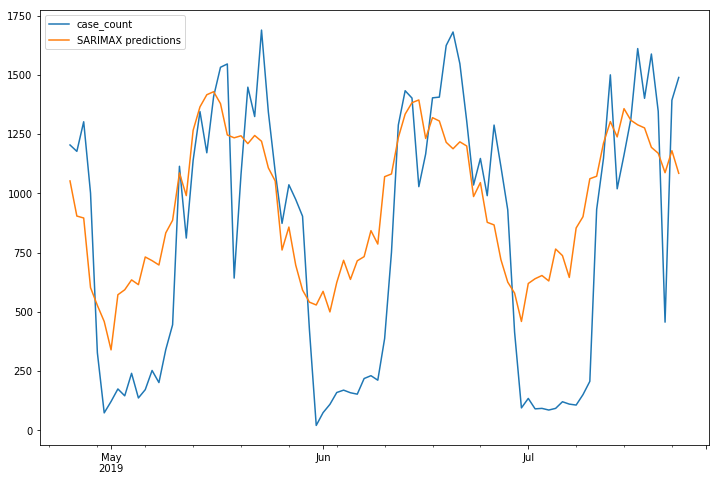

In [220]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_MP.plot(legend=True)

In [221]:
error=rmse(test['case_count'],predictions_MP)
error

388.1809531359939

In [222]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(4,1,1),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
fcast_MP=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [223]:
seg2_data=df[(df['segment']==2) & (df['state']=='ORISSA')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

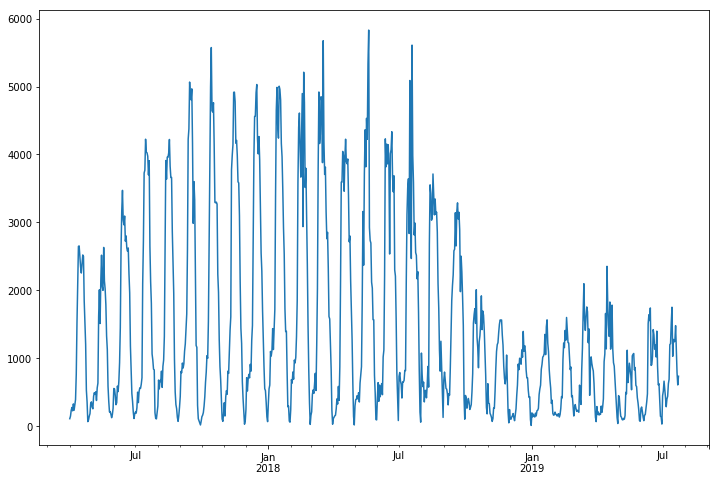

In [224]:
tm_df2['case_count'].plot(figsize=(12,8))

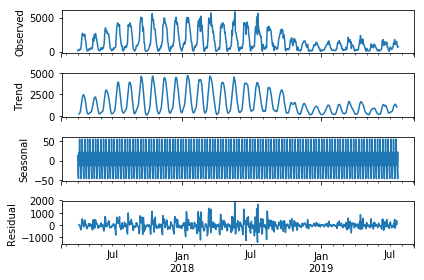

In [225]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

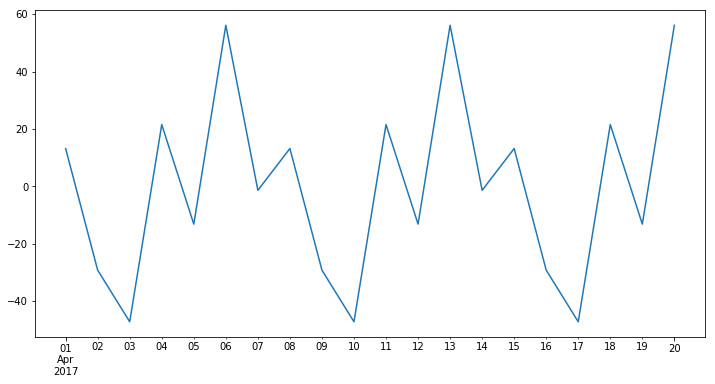

In [226]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

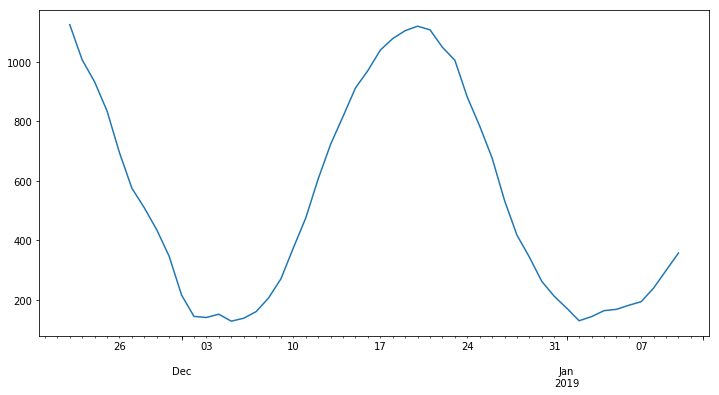

In [227]:
result.trend.iloc[600:650].plot(figsize=(12,6))

In [228]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [229]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=15,trace=True).summary()

In [230]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(2,1,2),seasonal_order=(2,0,1,30),enforce_invertibility=False)
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(2, 1, 2)x(2, 0, 1, 30)   Log Likelihood               -5662.312
Date:                            Sun, 26 Jan 2020   AIC                          11342.624
Time:                                    20:27:18   BIC                          11384.240
Sample:                                04-01-2017   HQIC                         11358.656
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday    -4.7306     35.032     -0.135      0.893     -73.392      63.930
ar.L1           -0.1692      0.038     -4.508      0.000      -0.243      -0.096
ar.L2            0.7695      0.036     21.098      0.000       0.698       0.841
ma.L1            0.0011      0.017      0.063      0.949      -0.032       0.034
ma.L2           -0.9800      0.017    -57.475      0.000      -1.013      -0.947
ar.S.L30         0.7372      0.110      6.723      0.000       0.522       0.952
ar.S.L60         0.0984      0.075      1.318      0.188      -0.048       0.245
ma.S.L30        -0.4468      0.105     -4.244      0.000      -0.653      -0.240
sigma2        2.535e+05   1.08e+04     23.489      0.000    2.32e+05    2.75e+05
===================================================================================
Ljung-Box (Q):                      184.55   Jarque-Bera (JB):               962.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             0.83
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [231]:
start=len(train)
end=len(train)+len(test)-1
predictions_ORISSA=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

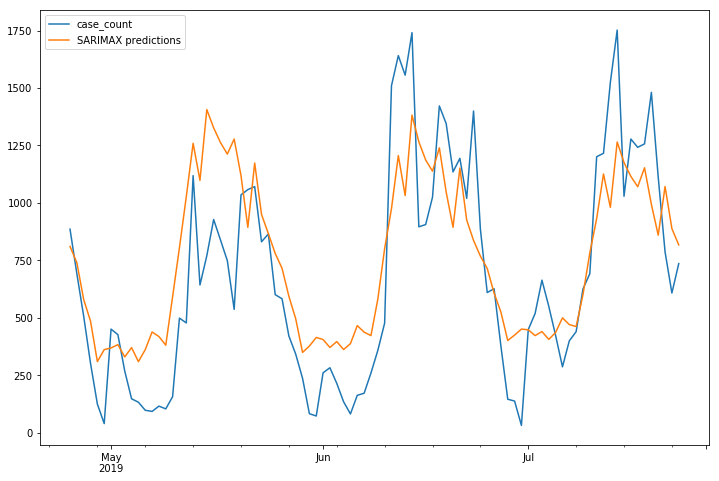

In [232]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_ORISSA.plot(legend=True)

In [233]:
error=rmse(test['case_count'],predictions_ORISSA)
error

282.36248966021316

In [234]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(2,1,2),seasonal_order=(2,0,1,30),enforce_invertibility=False)
result2=model.fit()
fcast_ORISSA=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [235]:
seg2_data=df[(df['segment']==2) & (df['state']=='TAMIL NADU')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

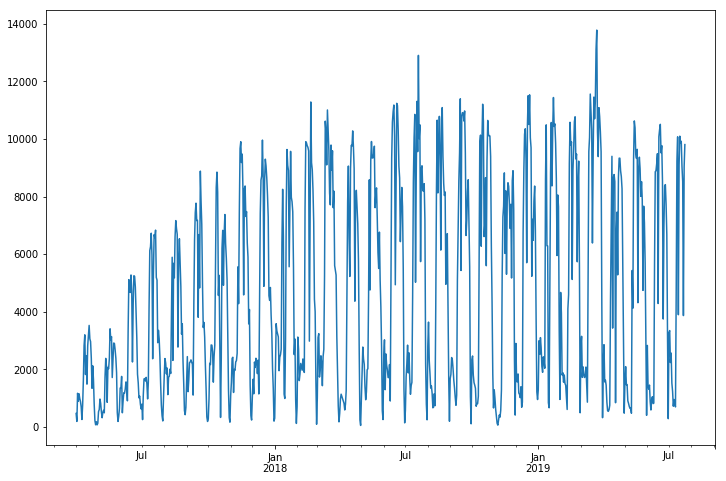

In [236]:
tm_df2['case_count'].plot(figsize=(12,8))

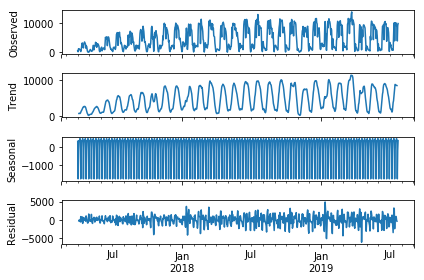

In [237]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

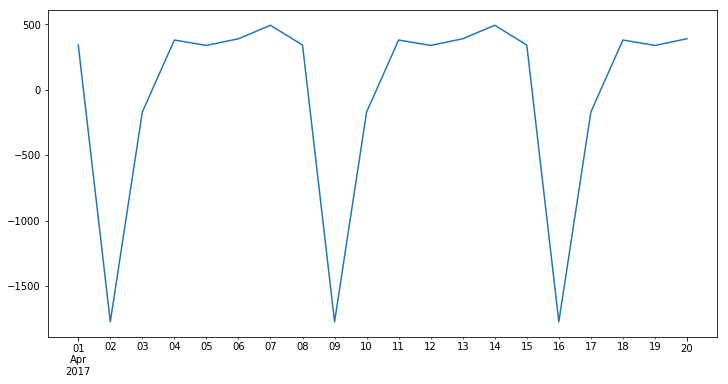

In [238]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

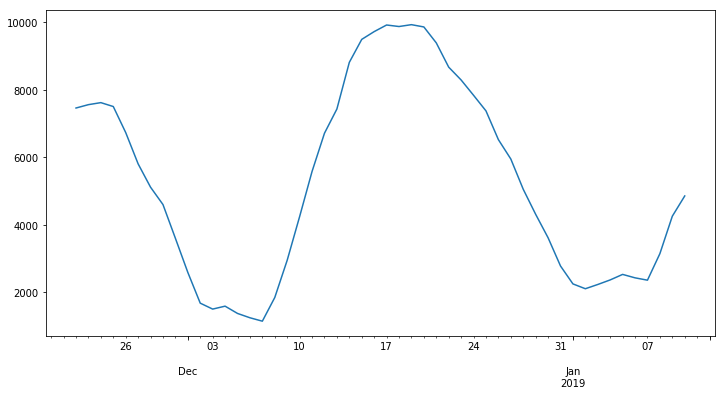

In [239]:
result.trend.iloc[600:650].plot(figsize=(12,6))

In [240]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [241]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=30,trace=True).summary()

In [242]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(1, 1, 2)x(2, 0, 1, 15)   Log Likelihood               -6594.137
Date:                            Sun, 26 Jan 2020   AIC                          13204.275
Time:                                    20:28:14   BIC                          13241.267
Sample:                                04-01-2017   HQIC                         13218.526
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday -1331.5535    117.281    -11.354      0.000   -1561.419   -1101.688
ar.L1            0.6041      0.058     10.343      0.000       0.490       0.719
ma.L1           -0.8679      0.055    -15.824      0.000      -0.975      -0.760
ma.L2           -0.1469      0.057     -2.587      0.010      -0.258      -0.036
ar.S.L15        -0.7468      0.061    -12.302      0.000      -0.866      -0.628
ar.S.L30         0.1913      0.051      3.764      0.000       0.092       0.291
ma.S.L15         0.7226      0.056     12.893      0.000       0.613       0.832
sigma2        2.872e+06   1.51e+05     19.067      0.000    2.58e+06    3.17e+06
===================================================================================
Ljung-Box (Q):                      124.14   Jarque-Bera (JB):               259.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.51   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.16e+14. Standard errors may be unstable.
"""

In [243]:
start=len(train)
end=len(train)+len(test)-1
predictions_TAMILNADU=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

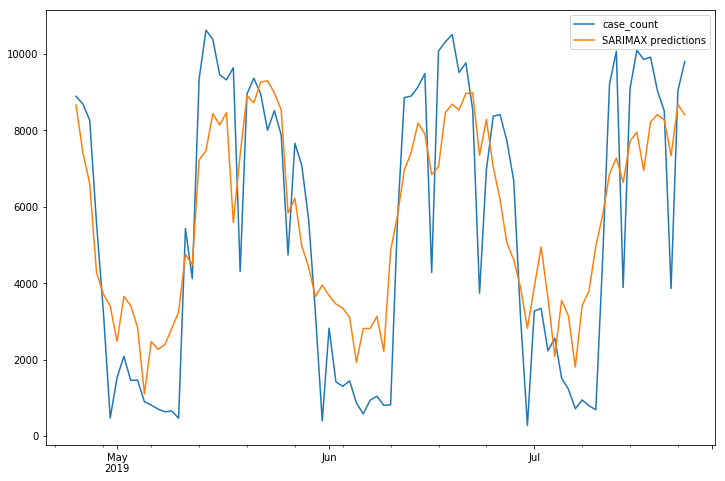

In [244]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_TAMILNADU.plot(legend=True)

In [245]:
error=rmse(test['case_count'],predictions_TAMILNADU)
error

1934.735333679395

In [246]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(1,1,2),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
fcast_TAMILNADU=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

In [247]:
seg2_data=df[(df['segment']==2) & (df['state']=='TRIPURA')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

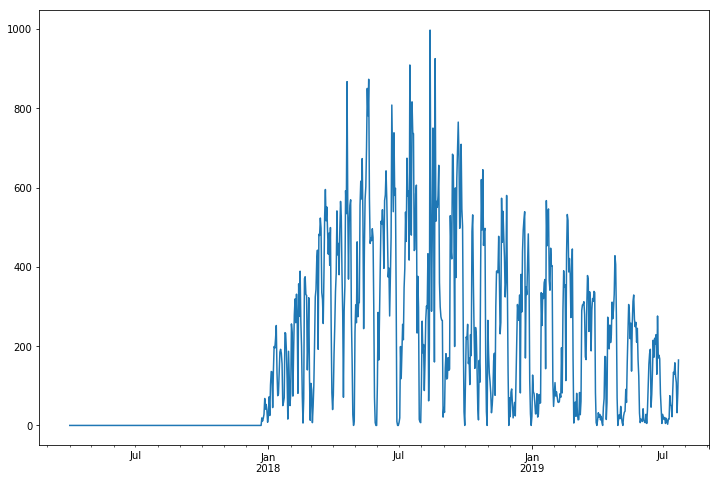

In [248]:
tm_df2['case_count'].plot(figsize=(12,8))

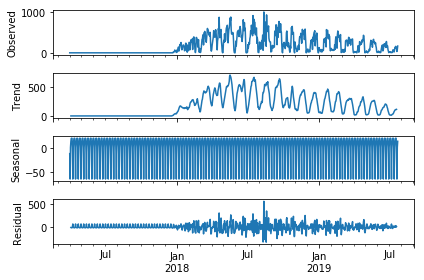

In [249]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

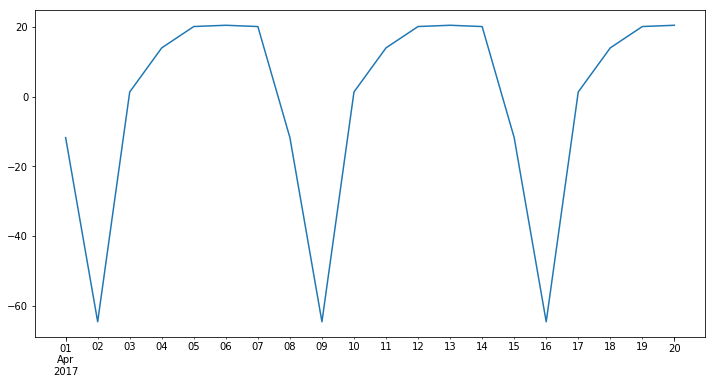

In [250]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

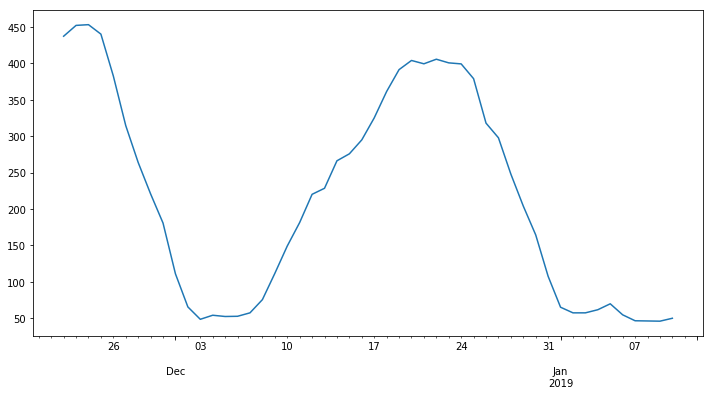

In [251]:
result.trend.iloc[600:650].plot(figsize=(12,6))

In [252]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [253]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=15,trace=True).summary()

In [254]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,1),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 15)   Log Likelihood               -4557.076
Date:                            Sun, 26 Jan 2020   AIC                           9128.151
Time:                                    20:28:38   BIC                           9160.520
Sample:                                04-01-2017   HQIC                          9140.621
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday   -48.9977      7.378     -6.641      0.000     -63.458     -34.538
ar.L1            0.6228      0.028     21.874      0.000       0.567       0.679
ma.L1           -0.9622      0.010    -92.182      0.000      -0.983      -0.942
ar.S.L15        -0.7067      0.073     -9.636      0.000      -0.850      -0.563
ar.S.L30         0.1294      0.035      3.709      0.000       0.061       0.198
ma.S.L15         0.6705      0.070      9.557      0.000       0.533       0.808
sigma2        1.051e+04    343.998     30.543      0.000    9832.639    1.12e+04
===================================================================================
Ljung-Box (Q):                      205.58   Jarque-Bera (JB):              1027.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              25.06   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [255]:
start=len(train)
end=len(train)+len(test)-1
predictions_TRIPURA=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

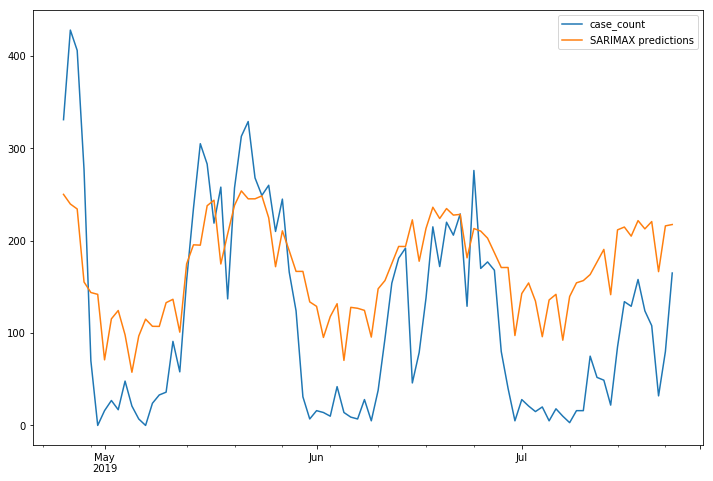

In [256]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_TRIPURA.plot(legend=True)

In [257]:
error=rmse(test['case_count'],predictions_TRIPURA)
error

92.03620422212852

In [258]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(1,1,1),seasonal_order=(2,0,1,15),enforce_invertibility=False)
result2=model.fit()
fcast_TRIPURA=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

In [259]:
seg2_data=df[(df['segment']==2) & (df['state']=='UTTAR PRADESH')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

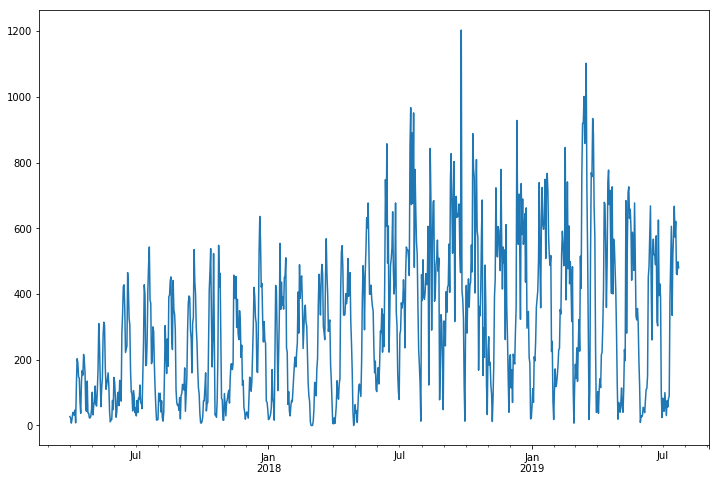

In [260]:
tm_df2['case_count'].plot(figsize=(12,8))

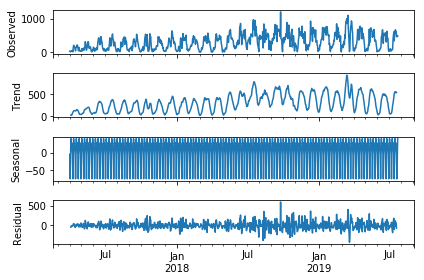

In [261]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

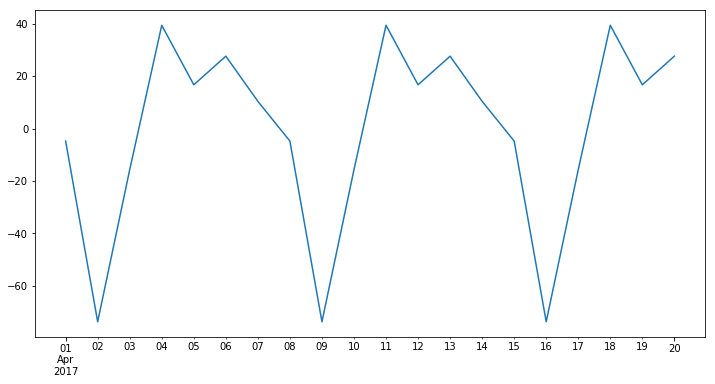

In [262]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

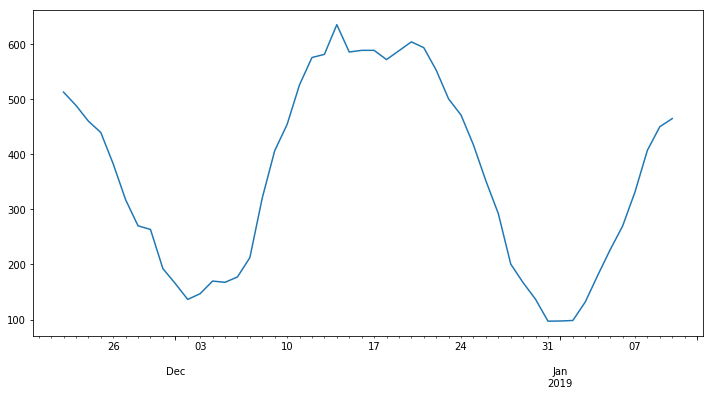

In [263]:
result.trend.iloc[600:650].plot(figsize=(12,6))

In [264]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [265]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=7,trace=True).summary()

In [266]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,2),seasonal_order=(1,0,1,30),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(1,1,1),seasonal_order=(2,0,2,7),enforce_invertibility=False)
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                        case_count   No. Observations:                  754
Model:             SARIMAX(1, 1, 1)x(2, 0, 2, 7)   Log Likelihood               -4678.358
Date:                           Sun, 26 Jan 2020   AIC                           9372.715
Time:                                   20:28:56   BIC                           9409.708
Sample:                               04-01-2017   HQIC                          9386.967
                                    - 04-24-2019                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday   -56.8015     11.335     -5.011      0.000     -79.017     -34.586
ar.L1            0.5422      0.032     16.988      0.000       0.480       0.605
ma.L1           -0.9699      0.010    -96.412      0.000      -0.990      -0.950
ar.S.L7          0.2503      0.008     30.904      0.000       0.234       0.266
ar.S.L14        -0.9951      0.007   -149.149      0.000      -1.008      -0.982
ma.S.L7         -0.2662      0.022    -11.935      0.000      -0.310      -0.222
ma.S.L14         0.9500      0.028     34.391      0.000       0.896       1.004
sigma2        1.736e+04    721.598     24.056      0.000    1.59e+04    1.88e+04
===================================================================================
Ljung-Box (Q):                       79.02   Jarque-Bera (JB):               480.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.15   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [267]:
start=len(train)
end=len(train)+len(test)-1
predictions_UTTARPRADESH=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

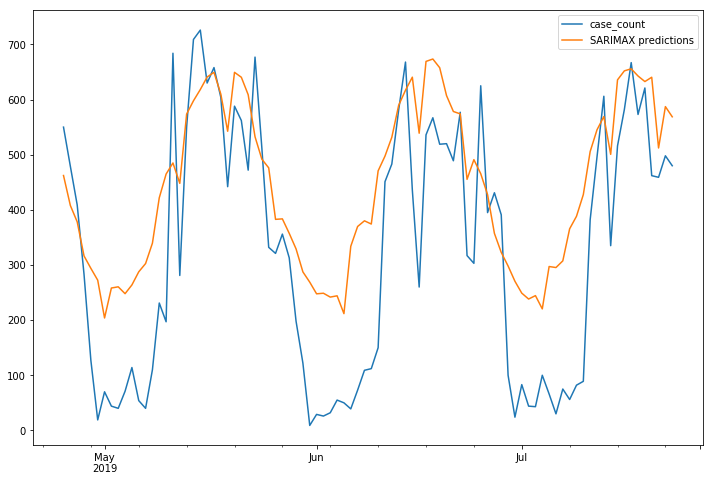

In [268]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_UTTARPRADESH.plot(legend=True)

In [269]:
error=rmse(test['case_count'],predictions_UTTARPRADESH)
error

169.26932840568173

In [270]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(1,1,1),seasonal_order=(2,0,2,7),enforce_invertibility=False)
result2=model.fit()
fcast_UTTARPRADESH=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [271]:
seg2_data=df[(df['segment']==2) & (df['state']=='WEST BENGAL')].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
tm_df2=tm_df2.reindex(idx, fill_value=0)
tm_df2=pd.concat([tm_df2,df_date_main],axis=1).fillna(0)
ls=[]
for i in tm_df2.index:
    if(i.strftime('%A')=='Sunday'):
        ls.append(1)
    else:
        ls.append(0)
tm_df2['Sunday']=ls

tm_df2['test_holiday'] = tm_df2['Sunday']+tm_df2['Holiday']
ds=[]
for i in tm_df2['test_holiday']:
    if(i>0):
        ds.append(1)
    else:
        ds.append(0)
tm_df2['test_holiday']=ds

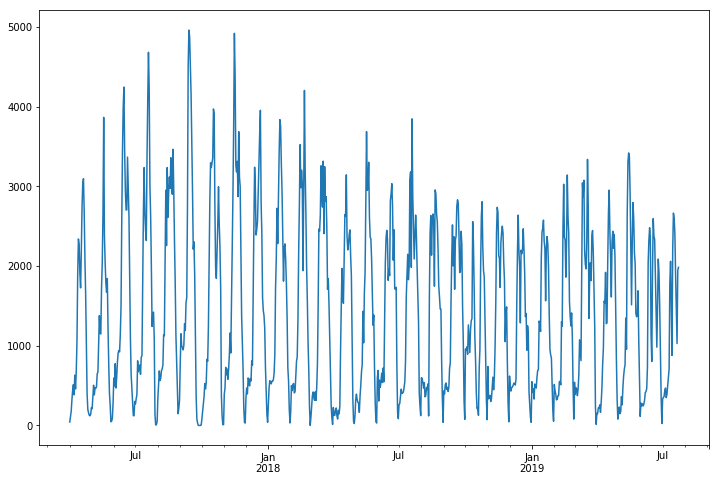

In [272]:
tm_df2['case_count'].plot(figsize=(12,8))

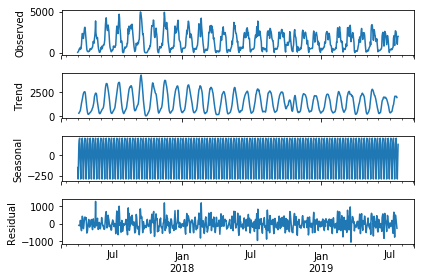

In [273]:
result=seasonal_decompose(tm_df2['case_count'])
result.plot();

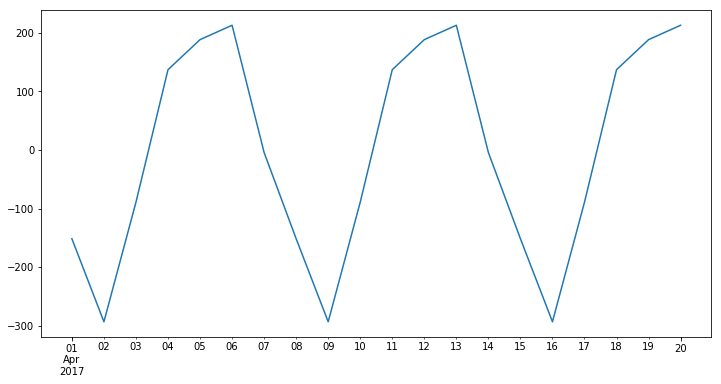

In [274]:
result.seasonal.iloc[:20].plot(figsize=(12,6))

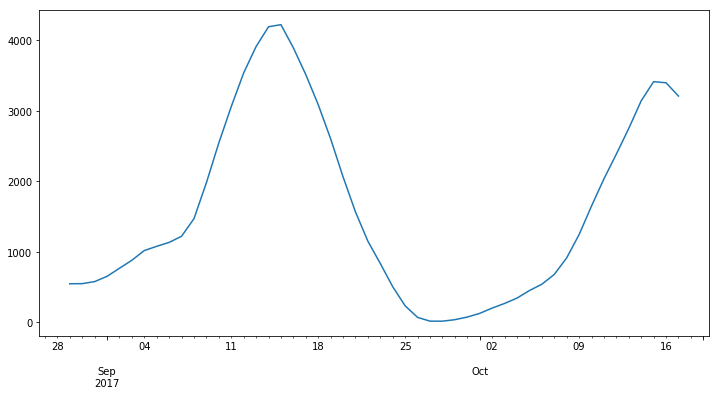

In [275]:
result.trend.iloc[150:200].plot(figsize=(12,6))

In [276]:
train=tm_df2.iloc[:754]
test=tm_df2.iloc[754:]

In [277]:
#auto_arima(train['case_count'],exogenous=train[['test_holiday']],seasonal=True,m=,trace=True).summary()

In [278]:
#model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(3,0,0),seasonal_order=(1,0,1,60),enforce_invertibility=False)
model=SARIMAX(train['case_count'],exog=train[['test_holiday']],order=(3,0,0),seasonal_order=(1,0,1,60),enforce_invertibility=False,initialization='approximate_diffuse')
result2=model.fit()
result2.summary()

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         case_count   No. Observations:                  754
Model:             SARIMAX(3, 0, 0)x(1, 0, 1, 60)   Log Likelihood               -5885.606
Date:                            Sun, 26 Jan 2020   AIC                          11785.212
Time:                                    20:29:29   BIC                          11817.589
Sample:                                04-01-2017   HQIC                         11797.684
                                     - 04-24-2019                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
test_holiday  -162.8553     77.991     -2.088      0.037    -315.715      -9.996
ar.L1            0.9939      0.093     10.653      0.000       0.811       1.177
ar.L2           -0.2195      0.140     -1.565      0.118      -0.495       0.055
ar.L3            0.0232      0.119      0.195      0.846      -0.211       0.257
ar.S.L60         0.9978      0.069     14.502      0.000       0.863       1.133
ma.S.L60        -0.5199      0.135     -3.840      0.000      -0.785      -0.255
sigma2        6.491e+05   5.55e+04     11.702      0.000     5.4e+05    7.58e+05
===================================================================================
Ljung-Box (Q):                      173.67   Jarque-Bera (JB):               141.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             0.45
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [279]:
start=len(train)
end=len(train)+len(test)-1
predictions_WESTBENGAL=result2.predict(start,end,exog=test[['test_holiday']],typ='levels').rename('SARIMAX predictions')

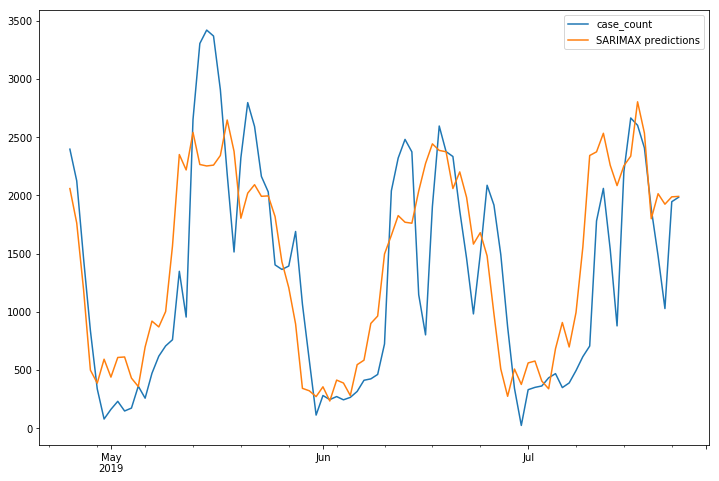

In [280]:
test['case_count'].plot(figsize=(12,8),legend=True)
predictions_WESTBENGAL.plot(legend=True)

In [281]:
error=rmse(test['case_count'],predictions_WESTBENGAL)
error

578.5563638477697

In [282]:
model=SARIMAX(tm_df2['case_count'],exog=tm_df2[['test_holiday']],order=(3,0,0),seasonal_order=(1,0,1,60),enforce_invertibility=False,initialization='approximate_diffuse')
result2=model.fit()
fcast_WESTBENGAL=result2.predict(start=len(tm_df2),end=len(tm_df2)+92,exog=df_date_forecast[['test_holiday']],typ='levels').rename('SARIMAX Future')

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [283]:
predictions2=predictions_Bihar+predictions_assam+predictions_CHHATTISGARH+predictions_GUJARAT+predictions_JHARKHAND+predictions_KERALA+predictions_KARNATAKA+predictions_MAHARASHTRA+predictions_MP+predictions_ORISSA+predictions_TAMILNADU+predictions_TRIPURA+predictions_UTTARPRADESH+predictions_WESTBENGAL
predictions2

2019-04-25    24260.462260
2019-04-26    20990.415121
2019-04-27    18258.639036
2019-04-28    11500.473439
2019-04-29    10787.176660
2019-04-30    10134.409254
2019-05-01     6177.131357
2019-05-02     9877.256182
2019-05-03     9849.539822
2019-05-04     9246.720069
2019-05-05     5707.382203
2019-05-06    10115.002586
2019-05-07     9784.705930
2019-05-08     9589.069518
2019-05-09    11152.217751
2019-05-10    13440.186072
2019-05-11    17726.536686
2019-05-12    16144.912091
2019-05-13    23238.395290
2019-05-14    23935.565008
2019-05-15    25796.946051
2019-05-16    26210.137436
2019-05-17    26957.349467
2019-05-18    21278.827971
2019-05-19    23175.919075
2019-05-20    25497.878274
2019-05-21    24724.822356
2019-05-22    26538.897666
2019-05-23    25774.109319
2019-05-24    24929.373256
                  ...     
2019-06-24    22530.701472
2019-06-25    19496.152983
2019-06-26    17233.430987
2019-06-27    14354.415217
2019-06-28    12678.254953
2019-06-29    11780.884150
2

In [284]:
forecast_seg2=fcast_Bihar+fcast_assam+fcast_CHHATTISGARH+fcast_GUJARAT+fcast_JHARKHAND+fcast_KERALA+fcast_KARNATAKA+fcast_MAHARASHTRA+fcast_MP+fcast_ORISSA+fcast_TAMILNADU+fcast_TRIPURA+fcast_UTTARPRADESH+fcast_WESTBENGAL

In [285]:
forecast_seg2

2019-07-24    27666.801281
2019-07-25    25169.172702
2019-07-26    22760.282256
2019-07-27    19770.683506
2019-07-28    13089.141872
2019-07-29    14195.497158
2019-07-30    13270.994032
2019-07-31    14455.803152
2019-08-01    13537.426682
2019-08-02    13074.912725
2019-08-03    13435.873790
2019-08-04     9262.650836
2019-08-05    12562.734077
2019-08-06    13553.144273
2019-08-07    14394.325613
2019-08-08    14621.706551
2019-08-09    16094.264812
2019-08-10    19340.010697
2019-08-11    18793.664810
2019-08-12    21056.246090
2019-08-13    25629.004865
2019-08-14    27041.271067
2019-08-15    22661.298394
2019-08-16    27460.802019
2019-08-17    27938.347306
2019-08-18    23304.521362
2019-08-19    27044.336179
2019-08-20    25900.821453
2019-08-21    26290.732381
2019-08-22    25902.441708
                  ...     
2019-09-25    17866.562190
2019-09-26    15886.648930
2019-09-27    15081.772085
2019-09-28    13563.039465
2019-09-29    10452.380560
2019-09-30    13526.365529
2

In [286]:
forecast_seg2.to_csv('C:/Users/Amruth PC/Desktop/Hackathon/LTFS/seg2.csv')

In [287]:
fs2=pd.DataFrame(forecast_seg2).reset_index()
fs2.columns=['application_date','case_count']
fs2['segment']=2
fs2=fs2[['application_date','segment','case_count']]

In [288]:
fs2

application_date  segment    case_count
0        2019-07-24        2  27666.801281
1        2019-07-25        2  25169.172702
2        2019-07-26        2  22760.282256
3        2019-07-27        2  19770.683506
4        2019-07-28        2  13089.141872
5        2019-07-29        2  14195.497158
6        2019-07-30        2  13270.994032
7        2019-07-31        2  14455.803152
8        2019-08-01        2  13537.426682
9        2019-08-02        2  13074.912725
10       2019-08-03        2  13435.873790
11       2019-08-04        2   9262.650836
12       2019-08-05        2  12562.734077
13       2019-08-06        2  13553.144273
14       2019-08-07        2  14394.325613
15       2019-08-08        2  14621.706551
16       2019-08-09        2  16094.264812
17       2019-08-10        2  19340.010697
18       2019-08-11        2  18793.664810
19       2019-08-12        2  21056.246090
20       2019-08-13        2  25629.004865
21       2019-08-14        2  27041.271067
22       2019-08-15        2  22661.298394
23       2019-08-16        2  27460.802019
24       2019-08-17        2  27938.347306
25       2019-08-18        2  23304.521362
26       2019-08-19        2  27044.336179
27       2019-08-20        2  25900.821453
28       2019-08-21        2  26290.732381
29       2019-08-22        2  25902.441708
..              ...      ...           ...
63       2019-09-25        2  17866.562190
64       2019-09-26        2  15886.648930
65       2019-09-27        2  15081.772085
66       2019-09-28        2  13563.039465
67       2019-09-29        2  10452.380560
68       2019-09-30        2  13526.365529
69       2019-10-01        2  13244.302649
70       2019-10-02        2  13700.706864
71       2019-10-03        2  13637.581470
72       2019-10-04        2  14377.257837
73       2019-10-05        2  14045.248528
74       2019-10-06        2  10709.582254
75       2019-10-07        2  14886.984207
76       2019-10-08        2  16098.207143
77       2019-10-09        2  18758.414800
78       2019-10-10        2  21416.870550
79       2019-10-11        2  23153.564173
80       2019-10-12        2  23987.766321
81       2019-10-13        2  21139.925214
82       2019-10-14        2  24585.782516
83       2019-10-15        2  25285.827103
84       2019-10-16        2  25610.608206
85       2019-10-17        2  25210.296630
86       2019-10-18        2  25075.530484
87       2019-10-19        2  24293.390789
88       2019-10-20        2  20611.365274
89       2019-10-21        2  24127.730260
90       2019-10-22        2  23753.958251
91       2019-10-23        2  22559.814382
92       2019-10-24        2  20281.149203

[93 rows x 3 columns]

In [289]:
fs1=pd.DataFrame(fcast_s1).reset_index()
fs1.columns=['application_date','case_count']
fs1['segment']=1
fs1=fs1[['application_date','segment','case_count']]

In [290]:
fs1

application_date  segment   case_count
0        2019-07-06        1  2644.663831
1        2019-07-07        1  2135.226273
2        2019-07-08        1  3456.868864
3        2019-07-09        1  3256.967322
4        2019-07-10        1  3428.043310
5        2019-07-11        1  3312.191191
6        2019-07-12        1  3023.045753
7        2019-07-13        1  2884.161183
8        2019-07-14        1  1931.866709
9        2019-07-15        1  3671.527053
10       2019-07-16        1  3074.571832
11       2019-07-17        1  3621.469133
12       2019-07-18        1  3149.853746
13       2019-07-19        1  3197.962274
14       2019-07-20        1  2740.434505
15       2019-07-21        1  2091.183403
16       2019-07-22        1  3542.895443
17       2019-07-23        1  3217.059726
18       2019-07-24        1  3507.376614
19       2019-07-25        1  3278.543347
20       2019-07-26        1  3097.403611
21       2019-07-27        1  2857.405716
22       2019-07-28        1  2003.727647
23       2019-07-29        1  3647.795179
24       2019-07-30        1  3138.490739
25       2019-07-31        1  3602.478458
26       2019-08-01        1  3209.210192
27       2019-08-02        1  3184.237707
28       2019-08-03        1  2796.987128
29       2019-08-04        1  2084.133596
..              ...      ...          ...
57       2019-09-01        1  2112.081099
58       2019-09-02        1  3368.130577
59       2019-09-03        1  3234.424247
60       2019-09-04        1  3614.958508
61       2019-09-05        1  3300.367888
62       2019-09-06        1  3203.596506
63       2019-09-07        1  2887.059598
64       2019-09-08        1  2114.524856
65       2019-09-09        1  3675.061649
66       2019-09-10        1  2949.092389
67       2019-09-11        1  3346.375484
68       2019-09-12        1  3303.167449
69       2019-09-13        1  3221.988813
70       2019-09-14        1  2891.243433
71       2019-09-15        1  2133.599990
72       2019-09-16        1  3678.926070
73       2019-09-17        1  3253.251327
74       2019-09-18        1  3638.256004
75       2019-09-19        1  3319.311667
76       2019-09-20        1  3227.722557
77       2019-09-21        1  2907.379070
78       2019-09-22        1  2141.332163
79       2019-09-23        1  3693.496681
80       2019-09-24        1  3259.953509
81       2019-09-25        1  3652.429444
82       2019-09-26        1  3326.352641
83       2019-09-27        1  3242.043898
84       2019-09-28        1  2915.357827
85       2019-09-29        1  2156.753555
86       2019-09-30        1  3700.760254

[87 rows x 3 columns]

In [291]:
final_sub=pd.concat([fs1,fs2],axis=0)[['application_date','segment','case_count']]


In [292]:
final_sub=final_sub.reset_index()

In [293]:
final_sub['id']=final_sub.index+1
final_sub[['id','application_date','segment','case_count']].to_csv('C:/Users/Amruth PC/Desktop/Hackathon/LTFS/submission1.csv',index=False)

In [353]:
test1=df[df['segment']==1]

In [354]:
test1.head()

application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0

In [355]:
state_pivot=pd.pivot_table(test1[['application_date','state','case_count']],columns='state',index=['application_date']).reset_index()
state_pivot.head()

application_date     case_count                                      \
state                  ANDHRA PRADESH  ASSAM     BIHAR CHHATTISGARH DELHI   
0           2017-04-01       0.000000   4.25  2.000000          0.0  58.0   
1           2017-04-03       0.000000   0.25  0.000000          0.0  13.0   
2           2017-04-04       0.000000   0.00  0.000000          0.0   6.0   
3           2017-04-05       1.500000  22.75  6.333333          0.0  74.0   
4           2017-04-07       0.833333  20.50  5.000000          0.0  74.0   

                                               ...                     \
state GUJARAT HARYANA JHARKHAND  KARNATAKA     ...     MADHYA PRADESH   
0       1.750     0.0       5.0   3.333333     ...                7.0   
1       0.000     0.0       0.0   0.333333     ...                2.0   
2       0.000     0.0       0.0   0.333333     ...                1.0   
3      30.000     0.0       7.0  42.333333     ...               21.0   
4      32.125     0.0      13.5  40.666667     ...               31.0   

                                                                  \
state MAHARASHTRA     ORISSA PUNJAB TAMIL NADU TELANGANA TRIPURA   
0        3.076923   8.000000    4.0   0.285714       0.5     1.0   
1        0.923077   0.333333    0.6   0.000000       0.0     0.0   
2        0.615385   0.000000    0.0   0.000000       0.0     0.0   
3       23.923077  33.333333   10.8   9.142857      42.5    10.5   
4       21.615385  26.000000    4.2   7.571429      11.5     6.5   

                                             
state UTTAR PRADESH UTTARAKHAND WEST BENGAL  
0               0.0         5.5       9.625  
1               0.0         0.5       1.000  
2               0.0         0.0       0.875  
3               0.0         9.0      33.750  
4               0.0         9.0      28.875  

[5 rows x 21 columns]

In [356]:
state_pivot.columns=['application_date','ANDHRA PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'DELHI', 'GUJARAT', 'HARYANA', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'ORISSA', 'PUNJAB', 'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL']

In [357]:

cols=['ANDHRA PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'DELHI', 'GUJARAT', 'HARYANA', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'ORISSA', 'PUNJAB', 'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL']
for k in cols:
    ls=[]
    for i in state_pivot[k]:
        if(i>0):
            ls.append(1)
        else:
            ls.append(0)
    state_pivot[k]=ls    

In [358]:
state_pivot

application_date  ANDHRA PRADESH  ASSAM  BIHAR  CHHATTISGARH  DELHI  \
0         2017-04-01               0      1      1             0      1   
1         2017-04-03               0      1      0             0      1   
2         2017-04-04               0      0      0             0      1   
3         2017-04-05               1      1      1             0      1   
4         2017-04-07               1      1      1             0      1   
5         2017-04-12               1      1      1             0      1   
6         2017-04-13               1      1      1             0      1   
7         2017-04-14               1      1      1             0      1   
8         2017-04-15               1      1      1             0      1   
9         2017-04-16               0      1      1             0      1   
10        2017-04-17               1      1      1             0      1   
11        2017-04-18               1      1      1             0      1   
12        2017-04-19               1      1      1             0      1   
13        2017-04-20               1      1      1             0      1   
14        2017-04-21               1      1      1             0      1   
15        2017-04-22               1      1      1             0      1   
16        2017-04-23               0      1      1             0      1   
17        2017-04-24               1      1      1             0      1   
18        2017-04-25               1      1      1             0      1   
19        2017-04-26               1      1      1             0      1   
20        2017-04-27               1      1      1             0      1   
21        2017-04-28               1      1      1             0      1   
22        2017-04-29               1      1      1             0      1   
23        2017-04-30               1      1      1             0      1   
24        2017-05-01               1      1      1             0      1   
25        2017-05-02               0      1      1             0      1   
26        2017-05-03               0      1      1             0      1   
27        2017-05-04               0      1      1             0      1   
28        2017-05-05               1      1      1             0      1   
29        2017-05-07               1      1      1             0      1   
..               ...             ...    ...    ...           ...    ...   
776       2019-06-06               1      1      1             1      1   
777       2019-06-07               1      1      1             1      1   
778       2019-06-08               1      1      1             1      1   
779       2019-06-09               1      1      1             1      1   
780       2019-06-10               1      1      1             1      1   
781       2019-06-11               1      1      1             1      1   
782       2019-06-12               1      1      1             1      1   
783       2019-06-13               1      1      1             1      1   
784       2019-06-14               1      1      1             1      1   
785       2019-06-15               1      1      1             1      1   
786       2019-06-16               1      1      1             1      1   
787       2019-06-17               1      1      1             1      1   
788       2019-06-18               1      1      1             1      1   
789       2019-06-19               1      1      1             1      1   
790       2019-06-20               1      1      1             1      1   
791       2019-06-21               1      1      1             1      1   
792       2019-06-22               1      1      1             1      1   
793       2019-06-23               1      1      1             1      1   
794       2019-06-24               1      1      1             1      1   
795       2019-06-25               1      1      1             1      1   
796       2019-06-26               1      1      1             1      1   
797       2019-06-27         

In [359]:
zone_pivot=pd.pivot_table(test1[['application_date','zone','case_count']],columns='zone',index=['application_date']).reset_index()
zone_pivot.head()
 

application_date case_count                                       
zone                     CENTRAL       EAST NORTH      SOUTH       WEST
0          2017-04-01        3.5   4.333333   7.8   1.869565   2.571429
1          2017-04-03        1.0   0.370370   1.6   0.086957   0.571429
2          2017-04-04        0.5   0.259259   0.6   0.043478   0.380952
3          2017-04-05       10.5  15.740741  12.8  17.608696  26.238095
4          2017-04-07       15.5  13.444444   9.5  13.652174  25.619048

In [360]:
zone_pivot.columns

MultiIndex(levels=[['case_count', 'application_date'], ['CENTRAL', 'EAST', 'NORTH', 'SOUTH', 'WEST', '']],
           labels=[[1, 0, 0, 0, 0, 0], [5, 0, 1, 2, 3, 4]],
           names=[None, 'zone'])

In [361]:
zone_pivot.columns=['application_date','CENTRAL', 'EAST', 'NORTH', 'SOUTH', 'WEST']
cols=['CENTRAL', 'EAST', 'NORTH', 'SOUTH', 'WEST']
for k in cols:
    ls=[]
    for i in zone_pivot[k]:
        if(i>0):
            ls.append(1)
        else:
            ls.append(0)
    zone_pivot[k]=ls   

In [362]:
branch_pivot=pd.pivot_table(test1[['application_date','branch_id','case_count']],columns='branch_id',index=['application_date']).reset_index()
branch_pivot.head()
 

application_date case_count                                       \
branch_id                         1.0   3.0    5.0   7.0   8.0   9.0  10.0   
0               2017-04-01       40.0  58.0   10.0   2.0  13.0  11.0   0.0   
1               2017-04-03        5.0  13.0    1.0   0.0   0.0   1.0   0.0   
2               2017-04-04        4.0   6.0    1.0   0.0   0.0   0.0   0.0   
3               2017-04-05      113.0  74.0  113.0  19.0  10.0  22.0  46.0   
4               2017-04-07       76.0  74.0  102.0  24.0  28.0  27.0  29.0   

                       ...                                                   \
branch_id  11.0  13.0  ...  262.0 263.0 264.0 265.0 266.0 267.0 268.0 269.0   
0           9.0   1.0  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1           1.0   0.0  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2           0.0   0.0  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3          23.0  15.0  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4          22.0  10.0  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                       
branch_id 270.0 271.0  
0           0.0   0.0  
1           0.0   0.0  
2           0.0   0.0  
3           0.0   0.0  
4           0.0   0.0  

[5 rows x 84 columns]

In [363]:
branch_pivot.columns

MultiIndex(levels=[['case_count', 'application_date'], [1.0, 3.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 29.0, 34.0, 35.0, 36.0, 42.0, 43.0, 48.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 74.0, 76.0, 77.0, 78.0, 79.0, 82.0, 84.0, 85.0, 100.0, 101.0, 103.0, 104.0, 105.0, 111.0, 117.0, 120.0, 121.0, 135.0, 136.0, 137.0, 147.0, 159.0, 165.0, 202.0, 207.0, 217.0, 248.0, 249.0, 250.0, 251.0, 254.0, 255.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0, '']],
           labels=[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [83, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,

In [364]:
branch_pivot.columns=['application_date',1.0, 3.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 29.0, 34.0, 35.0, 36.0, 42.0, 43.0, 48.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 74.0, 76.0, 77.0, 78.0, 79.0, 82.0, 84.0, 85.0, 100.0, 101.0, 103.0, 104.0, 105.0, 111.0, 117.0, 120.0, 121.0, 135.0, 136.0, 137.0, 147.0, 159.0, 165.0, 202.0, 207.0, 217.0, 248.0, 249.0, 250.0, 251.0, 254.0, 255.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0]
cols=[1.0, 3.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 29.0, 34.0, 35.0, 36.0, 42.0, 43.0, 48.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 74.0, 76.0, 77.0, 78.0, 79.0, 82.0, 84.0, 85.0, 100.0, 101.0, 103.0, 104.0, 105.0, 111.0, 117.0, 120.0, 121.0, 135.0, 136.0, 137.0, 147.0, 159.0, 165.0, 202.0, 207.0, 217.0, 248.0, 249.0, 250.0, 251.0, 254.0, 255.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0]
for k in cols:
    ls=[]
    for i in branch_pivot[k]:
        if(i>0):
            ls.append(1)
        else:
            ls.append(0)
    branch_pivot[k]=ls   

In [365]:
merged_df=state_pivot.merge(zone_pivot, on='application_date')
merged_df=merged_df.merge(branch_pivot,on='application_date')

In [366]:
merged_df.head()

application_date  ANDHRA PRADESH  ASSAM  BIHAR  CHHATTISGARH  DELHI  \
0       2017-04-01               0      1      1             0      1   
1       2017-04-03               0      1      0             0      1   
2       2017-04-04               0      0      0             0      1   
3       2017-04-05               1      1      1             0      1   
4       2017-04-07               1      1      1             0      1   

   GUJARAT  HARYANA  JHARKHAND  KARNATAKA  ...    262.0  263.0  264.0  265.0  \
0        1        0          1          1  ...        0      0      0      0   
1        0        0          0          1  ...        0      0      0      0   
2        0        0          0          1  ...        0      0      0      0   
3        1        0          1          1  ...        0      0      0      0   
4        1        0          1          1  ...        0      0      0      0   

   266.0  267.0  268.0  269.0  270.0  271.0  
0      0      0      0      0      0      0  
1      0      0      0      0      0      0  
2      0      0      0      0      0      0  
3      0      0      0      0      0      0  
4      0      0      0      0      0      0  

[5 rows x 109 columns]

In [367]:
merged_df.head()

application_date  ANDHRA PRADESH  ASSAM  BIHAR  CHHATTISGARH  DELHI  \
0       2017-04-01               0      1      1             0      1   
1       2017-04-03               0      1      0             0      1   
2       2017-04-04               0      0      0             0      1   
3       2017-04-05               1      1      1             0      1   
4       2017-04-07               1      1      1             0      1   

   GUJARAT  HARYANA  JHARKHAND  KARNATAKA  ...    262.0  263.0  264.0  265.0  \
0        1        0          1          1  ...        0      0      0      0   
1        0        0          0          1  ...        0      0      0      0   
2        0        0          0          1  ...        0      0      0      0   
3        1        0          1          1  ...        0      0      0      0   
4        1        0          1          1  ...        0      0      0      0   

   266.0  267.0  268.0  269.0  270.0  271.0  
0      0      0      0      0      0      0  
1      0      0      0      0      0      0  
2      0      0      0      0      0      0  
3      0      0      0      0      0      0  
4      0      0      0      0      0      0  

[5 rows x 109 columns]

In [368]:
idx = pd.date_range(min(merged_df.application_date), max(merged_df.application_date))
merged_df=merged_df.set_index('application_date')
merged_df=merged_df.reindex(idx, fill_value=0)

In [369]:
merged_df

ANDHRA PRADESH  ASSAM  BIHAR  CHHATTISGARH  DELHI  GUJARAT  \
2017-04-01               0      1      1             0      1        1   
2017-04-02               0      0      0             0      0        0   
2017-04-03               0      1      0             0      1        0   
2017-04-04               0      0      0             0      1        0   
2017-04-05               1      1      1             0      1        1   
2017-04-06               0      0      0             0      0        0   
2017-04-07               1      1      1             0      1        1   
2017-04-08               0      0      0             0      0        0   
2017-04-09               0      0      0             0      0        0   
2017-04-10               0      0      0             0      0        0   
2017-04-11               0      0      0             0      0        0   
2017-04-12               1      1      1             0      1        1   
2017-04-13               1      1      1             0      1        1   
2017-04-14               1      1      1             0      1        1   
2017-04-15               1      1      1             0      1        1   
2017-04-16               0      1      1             0      1        1   
2017-04-17               1      1      1             0      1        1   
2017-04-18               1      1      1             0      1        1   
2017-04-19               1      1      1             0      1        1   
2017-04-20               1      1      1             0      1        1   
2017-04-21               1      1      1             0      1        1   
2017-04-22               1      1      1             0      1        1   
2017-04-23               0      1      1             0      1        1   
2017-04-24               1      1      1             0      1        1   
2017-04-25               1      1      1             0      1        1   
2017-04-26               1      1      1             0      1        1   
2017-04-27               1      1      1             0      1        1   
2017-04-28               1      1      1             0      1        1   
2017-04-29               1      1      1             0      1        1   
2017-04-30               1      1      1             0      1        1   
...                    ...    ...    ...           ...    ...      ...   
2019-06-06               1      1      1             1      1        1   
2019-06-07               1      1      1             1      1        1   
2019-06-08               1      1      1             1      1        1   
2019-06-09               1      1      1             1      1        1   
2019-06-10               1      1      1             1      1        1   
2019-06-11               1      1      1             1      1        1   
2019-06-12               1      1      1             1      1        1   
2019-06-13               1      1      1             1      1        1   
2019-06-14               1      1      1             1      1        1   
2019-06-15               1      1      1             1      1        1   
2019-06-16               1      1      1             1      1        1   
2019-06-17               1      1      1             1      1        1   
2019-06-18               1      1      1             1      1        1   
2019-06-19               1      1      1             1      1        1   
2019-06-20               1      1      1             1      1        1   
2019-06-21               1      1      1             1      1        1   
2019-06-22               1      1      1             1      1        1   
2019-06-23               1      1      1             1      1        1   
2019-06-24               1      1      1             1      1        1   
2019-06-25               1      1      1             1      1        1   
2019-06-26               1      1      1             1      1        1   
2019-06-27               1      1      1             1      1        1   
2019-06-28      

In [370]:
day=[]
month=[]
year=[]
for i in merged_df.index:
    day.append(i.strftime('%A'))
    month.append(i.month)
    year.append(i.year)
merged_df['Days']=day
merged_df['Month']=month
merged_df['year']=year

In [371]:
seg1_data=df[df['segment']==1].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg1=seg1_data.reset_index()
data_seg1.columns=['application_date','segment','case_count']
tm_df=data_seg1[['application_date','case_count']]
tm_df=tm_df.sort_values(['application_date'],ascending = True)
idx = pd.date_range(min(tm_df.application_date), max(tm_df.application_date))
tm_df=tm_df.set_index('application_date')
seg1=tm_df.reindex(idx, fill_value=0)

In [372]:
seg1

case_count
2017-04-01       299.0
2017-04-02         0.0
2017-04-03        42.0
2017-04-04        23.0
2017-04-05      1530.0
2017-04-06         0.0
2017-04-07      1341.0
2017-04-08         0.0
2017-04-09         0.0
2017-04-10         0.0
2017-04-11         0.0
2017-04-12      1468.0
2017-04-13      1340.0
2017-04-14      1330.0
2017-04-15       981.0
2017-04-16       409.0
2017-04-17      1515.0
2017-04-18      1442.0
2017-04-19      1404.0
2017-04-20      1350.0
2017-04-21      1390.0
2017-04-22      1060.0
2017-04-23       380.0
2017-04-24      1626.0
2017-04-25      1450.0
2017-04-26      1546.0
2017-04-27      1710.0
2017-04-28      1927.0
2017-04-29      1355.0
2017-04-30      6472.0
...                ...
2019-06-06      3768.0
2019-06-07      3847.0
2019-06-08      2724.0
2019-06-09      1700.0
2019-06-10      4174.0
2019-06-11      3586.0
2019-06-12      3786.0
2019-06-13      3623.0
2019-06-14      3498.0
2019-06-15      2776.0
2019-06-16      1760.0
2019-06-17      4279.0
2019-06-18      3301.0
2019-06-19      3810.0
2019-06-20      3538.0
2019-06-21      3432.0
2019-06-22      2512.0
2019-06-23      1633.0
2019-06-24      3804.0
2019-06-25      3154.0
2019-06-26      3443.0
2019-06-27      3500.0
2019-06-28      3519.0
2019-06-29      2894.0
2019-06-30      1951.0
2019-07-01      3650.0
2019-07-02      3212.0
2019-07-03      3824.0
2019-07-04      4240.0
2019-07-05        13.0

[826 rows x 1 columns]

In [373]:
df_date_forecast=df_date[(df_date['DATE']>='2017-04-01 00:00:00') & (df_date['DATE']<='2019-07-05 00:00:00')][['DATE','Holiday']]
df_date_forecast['DATE']=pd.to_datetime(df_date_forecast['DATE'])
df_date_forecast=df_date_forecast.reset_index()[['DATE','Holiday']]
idx2 = pd.date_range('2017-04-01 00:00:00', '2019-07-05 00:00:00')
fdate=pd.DataFrame(idx2)
fdate.columns=['DATE']
df_date_forecast=pd.merge(fdate,df_date_forecast,left_on='DATE',right_on='DATE',how='left').fillna(0)
df_date_forecast=df_date_forecast.set_index('DATE')

In [374]:
df_segment1=pd.concat([merged_df,df_date_forecast,seg1],axis=1)

In [375]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_segment1['Days'], prefix = 'Days')
# Drop column B as it is now encoded
df_segment1 = df_segment1.drop('Days',axis = 1)
# Join the encoded df
df_segment1 = df_segment1.join(one_hot)


# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_segment1['Month'], prefix = 'Month')
# Drop column B as it is now encoded
df_segment1 = df_segment1.drop('Month',axis = 1)
# Join the encoded df
df_segment1 = df_segment1.join(one_hot)


# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_segment1['year'], prefix = 'year')
# Drop column B as it is now encoded
df_segment1 = df_segment1.drop('year',axis = 1)
# Join the encoded df
df_segment1 = df_segment1.join(one_hot)



In [376]:
lis=[]
for i in df_segment1.columns:
    if(i in [266.0,265.0,137.0,82.0,74.0,73.0,72.0,61.0,19.0,16.0,10.0,'KERALA','case_count']):
        print('done')
    else:
        lis.append(i)

done
done
done
done
done
done
done
done
done
done
done
done
done


In [377]:
Y=df_segment1[['case_count']]

In [378]:
X=df_segment1[lis]

In [379]:
from sklearn.model_selection import train_test_split
x_train=X.iloc[:736]
x_test=X.iloc[736:]
y_train=Y.iloc[:736]
y_test =Y.iloc[736:]

In [380]:
x_train

ANDHRA PRADESH  ASSAM  BIHAR  CHHATTISGARH  DELHI  GUJARAT  \
DATE                                                                     
2017-04-01               0      1      1             0      1        1   
2017-04-02               0      0      0             0      0        0   
2017-04-03               0      1      0             0      1        0   
2017-04-04               0      0      0             0      1        0   
2017-04-05               1      1      1             0      1        1   
2017-04-06               0      0      0             0      0        0   
2017-04-07               1      1      1             0      1        1   
2017-04-08               0      0      0             0      0        0   
2017-04-09               0      0      0             0      0        0   
2017-04-10               0      0      0             0      0        0   
2017-04-11               0      0      0             0      0        0   
2017-04-12               1      1      1             0      1        1   
2017-04-13               1      1      1             0      1        1   
2017-04-14               1      1      1             0      1        1   
2017-04-15               1      1      1             0      1        1   
2017-04-16               0      1      1             0      1        1   
2017-04-17               1      1      1             0      1        1   
2017-04-18               1      1      1             0      1        1   
2017-04-19               1      1      1             0      1        1   
2017-04-20               1      1      1             0      1        1   
2017-04-21               1      1      1             0      1        1   
2017-04-22               1      1      1             0      1        1   
2017-04-23               0      1      1             0      1        1   
2017-04-24               1      1      1             0      1        1   
2017-04-25               1      1      1             0      1        1   
2017-04-26               1      1      1             0      1        1   
2017-04-27               1      1      1             0      1        1   
2017-04-28               1      1      1             0      1        1   
2017-04-29               1      1      1             0      1        1   
2017-04-30               1      1      1             0      1        1   
...                    ...    ...    ...           ...    ...      ...   
2019-03-08               1      1      1             1      1        1   
2019-03-09               1      1      1             1      1        1   
2019-03-10               1      1      1             1      1        1   
2019-03-11               1      1      1             1      1        1   
2019-03-12               1      1      1             1      1        1   
2019-03-13               1      1      1             1      1        1   
2019-03-14               1      1      1             1      1        1   
2019-03-15               1      1      1             1      1        1   
2019-03-16               1      1      1             1      1        1   
2019-03-17               1      1      1             1      1        1   
2019-03-18               1      1      1             1      1        1   
2019-03-19               1      1      1             1      1        1   
2019-03-20               1      1      1             1      1        1   
2019-03-21               1      1      1             0      0        1   
2019-03-22               1      1      1             1      1        1   
2019-03-23               1      1      1             1      1        1   
2019-03-24               1      1      1             1      1        1   
2019-03-25               1      1      1             1      1        1   
2019-03-26               1      1      1             1      1        1   
2019-03-27               1      1      1             1      1        1   
2019-03-28               1      1      1             1      1        1   
2019-03-29      

In [381]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
regressor=RandomForestRegressor(n_estimators=10000,random_state=0)
print(regressor.fit(x_train,y_train))

C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


In [382]:
y_pred1=regressor.predict(x_test)
y_pred1

array([2425.31229937, 4045.83272564, 3434.7545725 , 3813.9111012 ,
       3914.9914633 , 4146.00079689, 3753.80734008, 2430.16844937,
       4045.83272564, 3434.7545725 , 4027.50682906, 2744.42810304,
       4067.84298487, 3250.71399115, 1720.03788917, 4045.83272564,
       3434.7545725 , 3813.9111012 , 3802.50970694, 4146.00079689,
       3250.71399115, 1808.49505833, 4014.32506159, 3434.7545725 ,
       3864.18688718, 3608.13351983, 3600.95464122, 2703.49778542,
       2141.31372   , 3741.98481303, 3303.07001855, 3492.99339318,
       3608.13351983, 3600.95464122, 2703.49778542, 2353.4265881 ,
       3791.46807251, 3303.07001855, 3492.99339318, 3608.13351983,
       3600.95464122, 3120.53377957, 1775.9494475 , 3791.46807251,
       3303.07001855, 3492.99339318, 3608.13351983, 3600.95464122,
       2703.49778542, 1557.54153238, 3791.46807251, 3303.07001855,
       3492.99339318, 3608.13351983, 3600.95464122, 2876.9820189 ,
       1710.0078594 , 3872.64426172, 3270.48662005, 3757.79321

In [383]:
#Finding the R2 score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
R2score=r2_score(y_test,y_pred1)
rmse=np.sqrt(mean_squared_error(y_test,y_pred1))
print('RMSE :',rmse) 
print('R2 :',R2score)

RMSE : 548.1271383780163
R2 : 0.5821226377251401


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


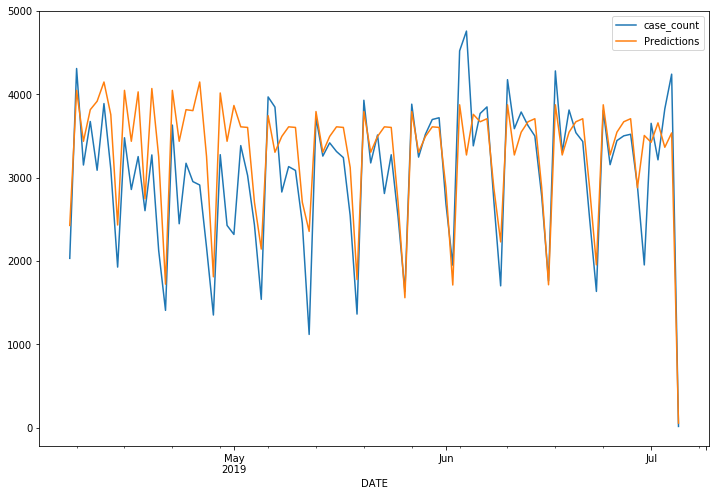

In [384]:
y_test['Predictions']=y_pred1
y_test.plot(figsize=(12,8),legend=True)

In [ ]:
y_test.to_csv('C:/Users/Amruth PC/Desktop/Hackathon/LTFS/betterseg1.csv')

In [326]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     4.491
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           6.22e-35
Time:                        20:30:41   Log-Likelihood:                -7257.5
No. Observations:                 826   AIC:                         1.474e+04
Df Residuals:                     715   BIC:                         1.526e+04
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ANDHRA PRADESH  -374.4982    652.804     -0.574      0.566   -1656.140     907.144
ASSAM            959.8341   2977.752      0.322      0.747   -4886.348    6806.017
BIHAR           4872.8821   2832.290      1.720      0.086    -687.718    1.04e+04
CHHATTISGARH     -98.3445    253.897     -0.387      0.699    -596.818     400.128
DELHI           3227.6685   2353.578      1.371      0.171   -1393.082    7848.419
GUJARAT          941.3158   2091.676      0.450      0.653   -3165.246    5047.877
HARYANA         -378.0546    794.952     -0.476      0.635   -1938.774    1182.665
JHARKHAND       1555.0525   2893.808      0.537      0.591   -4126.323    7236.428
KARNATAKA       4183.6709   4054.809      1.032      0.303   -3777.084    1.21e+04
MADHYA PRADESH   127.9322    416.868      0.307      0.759    -690.500     946.364
MAHARASHTRA     3200.6674   2223.551      1.439      0.150   -1164.801    7566.136
ORISSA           936.1123   1715.336      0.546      0.585   -2431.586    4303.811
PUNJAB         -1567.7886   1884.319     -0.832      0.406   -5267.249    2131.672
TAMIL NADU       804.4056   1946.272      0.413      0.680   -3016.685    4625.497
TELANGANA         73.7732   1077.205      0.068      0.945   -2041.090    2188.636
TRIPURA         -702.0045   1645.794     -0.427      0.670   -3933.171    2529.162
UTTAR PRADESH   -215.7162    861.275     -0.250      0.802   -1906.647    1475.215
UTTARAKHAND     -336.7620   1865.815     -0.180      0.857   -3999.892    3326.368
WEST BENGAL    -1764.1695   2467.480     -0.715      0.475   -6608.543    3080.204
CENTRAL          127.9322    416.868      0.307      0.759    -690.500     946.364
EAST            2319.7010   1905.987      1.217      0.224   -1422.299    6061.701
NORTH          -8564.2807   6564.503     -1.305      0.192   -2.15e+04    4323.725
SOUTH          -1786.2534   2353.582     -0.759      0.448   -6407.011    2834.504
WEST           -1533.9772   2228.376     -0.688      0.491   -5908.919    2840.964
1.0             -398.7612   1742.710     -0.229      0.819   -3820.202    3022.679
3.0             3227.6685   2353.578      1.371      0.171   -1393.082    7848.419
5.0            -3021.6922   2629.541     -1.149      0.251   -8184.238    2140.853
7.0             -782.2665   1203.596     -0.650      0.516   -3145.271    1580.738
8.0            -1262.7897   1343.824     -0.940      0.348   -3901.102    1375.523
9.0              987.0090   1832.371      0.539      0.590   -2610.461    4584.479
11.0            -971.1488   1517.506     -0.640      0.522   -3950.450    2008.152
13.0            -335.9731    583.860     -0.575      0.565   -1482.258     810.312
14.0             661.2001    885.894      0.746      0.456   -1078.064    2400.464
15.0             860.7421   1318.450      0.653      0.514   -1727.754    3449.238
17.0        

In [327]:
test2=df[df['segment']==2]

In [328]:
test2=test2.reset_index()[['application_date','state','case_count']]

In [329]:
test2

application_date        state  case_count
0           2017-04-01        ASSAM         0.0
1           2017-04-02        ASSAM         0.0
2           2017-04-03        ASSAM         0.0
3           2017-04-04        ASSAM         0.0
4           2017-04-05        ASSAM         0.0
5           2017-04-06        ASSAM         0.0
6           2017-04-07        ASSAM         0.0
7           2017-04-08        ASSAM         0.0
8           2017-04-09        ASSAM         0.0
9           2017-04-10        ASSAM         0.0
10          2017-04-11        ASSAM         0.0
11          2017-04-12        ASSAM         0.0
12          2017-04-13        ASSAM         0.0
13          2017-04-14        ASSAM         0.0
14          2017-04-15        ASSAM         0.0
15          2017-04-16        ASSAM         0.0
16          2017-04-17        ASSAM         0.0
17          2017-04-18        ASSAM         0.0
18          2017-04-19        ASSAM         0.0
19          2017-04-20        ASSAM         0.0
20          2017-04-21        ASSAM         0.0
21          2017-04-22        ASSAM         0.0
22          2017-04-23        ASSAM         0.0
23          2017-04-24        ASSAM         0.0
24          2017-04-25        ASSAM         0.0
25          2017-04-26        ASSAM         0.0
26          2017-04-27        ASSAM         0.0
27          2017-04-28        ASSAM         0.0
28          2017-04-29        ASSAM         0.0
29          2017-04-30        ASSAM         0.0
...                ...          ...         ...
13474       2019-06-24  WEST BENGAL      1493.0
13475       2019-06-25  WEST BENGAL      2087.0
13476       2019-06-26  WEST BENGAL      1917.0
13477       2019-06-27  WEST BENGAL      1492.0
13478       2019-06-28  WEST BENGAL       871.0
13479       2019-06-29  WEST BENGAL       343.0
13480       2019-06-30  WEST BENGAL        24.0
13481       2019-07-01  WEST BENGAL       331.0
13482       2019-07-02  WEST BENGAL       351.0
13483       2019-07-03  WEST BENGAL       363.0
13484       2019-07-04  WEST BENGAL       433.0
13485       2019-07-05  WEST BENGAL       469.0
13486       2019-07-06  WEST BENGAL       349.0
13487       2019-07-07  WEST BENGAL       389.0
13488       2019-07-08  WEST BENGAL       495.0
13489       2019-07-09  WEST BENGAL       615.0
13490       2019-07-10  WEST BENGAL       706.0
13491       2019-07-11  WEST BENGAL      1781.0
13492       2019-07-12  WEST BENGAL      2060.0
13493       2019-07-13  WEST BENGAL      1536.0
13494       2019-07-14  WEST BENGAL       879.0
13495       2019-07-15  WEST BENGAL      2205.0
13496       2019-07-16  WEST BENGAL      2665.0
13497       2019-07-17  WEST BENGAL      2602.0
13498       2019-07-18  WEST BENGAL      2408.0
13499       2019-07-19  WEST BENGAL      1886.0
13500       2019-07-20  WEST BENGAL      1480.0
13501       2019-07-21  WEST BENGAL      1028.0
13502       2019-07-22  WEST BENGAL      1946.0
13503       2019-07-23  WEST BENGAL      1984.0

[13504 rows x 3 columns]

In [330]:
state_pivot2=pd.pivot_table(test2[['application_date','state','case_count']],columns='state',index=['application_date']).reset_index()
state_pivot2.head()

application_date case_count                                     \
state                       ASSAM BIHAR CHHATTISGARH GUJARAT HARYANA   
0           2017-04-01        0.0   0.0         34.0     0.0     0.0   
1           2017-04-02        0.0   0.0         37.0     5.0     0.0   
2           2017-04-03        0.0   0.0         45.0     9.0     0.0   
3           2017-04-04        0.0   0.0        109.0     7.0     0.0   
4           2017-04-05        0.0   0.0         97.0    44.0     0.0   

                                                                           \
state JHARKHAND KARNATAKA KERALA MADHYA PRADESH MAHARASHTRA ORISSA PUNJAB   
0           0.0     165.0   23.0           36.0         0.0  111.0    0.0   
1           0.0      89.0    6.0            0.0         0.0  148.0    0.0   
2           0.0     203.0  152.0           28.0         0.0  233.0    0.0   
3           0.0     398.0  146.0           85.0         0.0  276.0    0.0   
4           0.0     250.0  173.0            0.0         0.0  227.0    0.0   

                                                    
state TAMIL NADU TRIPURA UTTAR PRADESH WEST BENGAL  
0          458.0     0.0          27.0        43.0  
1          182.0     0.0          22.0       116.0  
2         1161.0     0.0           7.0       178.0  
3          881.0     0.0          20.0       323.0  
4         1142.0     0.0          39.0       443.0

In [331]:
state_pivot2.columns

MultiIndex(levels=[['case_count', 'application_date'], ['ASSAM', 'BIHAR', 'CHHATTISGARH', 'GUJARAT', 'HARYANA', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'ORISSA', 'PUNJAB', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL', '']],
           labels=[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
           names=[None, 'state'])

In [332]:
state_pivot2.columns=['application_date','ASSAM', 'BIHAR', 'CHHATTISGARH', 'GUJARAT', 'HARYANA', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'ORISSA', 'PUNJAB', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL']
cols=['ASSAM', 'BIHAR', 'CHHATTISGARH', 'GUJARAT', 'HARYANA', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'ORISSA', 'PUNJAB', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL']
for k in cols:
    ls=[]
    for i in state_pivot2[k]:
        if(i>0):
            ls.append(1)
        else:
            ls.append(0)
    state_pivot2[k]=ls    

In [333]:
state_pivot2=state_pivot2.set_index('application_date')

In [334]:
seg2_data=df[df['segment']==2].groupby(['application_date','segment']).agg({'case_count':[np.sum]})
data_seg2=seg2_data.reset_index()
data_seg2.columns=['application_date','segment','case_count']
tm_df2=data_seg2[['application_date','case_count']]
tm_df2=tm_df2.sort_values(['application_date'],ascending = True)
idx2 = pd.date_range(min(tm_df2.application_date), max(tm_df2.application_date))
tm_df2=tm_df2.set_index('application_date')
seg2=tm_df2.reindex(idx2, fill_value=0)

In [335]:
seg2

case_count
2017-04-01       897.0
2017-04-02       605.0
2017-04-03      2016.0
2017-04-04      2245.0
2017-04-05      2415.0
2017-04-06      2379.0
2017-04-07      2249.0
2017-04-08      2297.0
2017-04-09      1435.0
2017-04-10      3166.0
2017-04-11      5649.0
2017-04-12      8781.0
2017-04-13     10351.0
2017-04-14      8289.0
2017-04-15      8799.0
2017-04-16      6745.0
2017-04-17      9597.0
2017-04-18     11351.0
2017-04-19     12310.0
2017-04-20     12384.0
2017-04-21     10857.0
2017-04-22      8881.0
2017-04-23      6172.0
2017-04-24      5931.0
2017-04-25      4422.0
2017-04-26      2384.0
2017-04-27      1102.0
2017-04-28       810.0
2017-04-29       854.0
2017-04-30       881.0
...                ...
2019-06-24     23278.0
2019-06-25     25387.0
2019-06-26     25386.0
2019-06-27     23167.0
2019-06-28     18434.0
2019-06-29      7251.0
2019-06-30       865.0
2019-07-01      6974.0
2019-07-02      7107.0
2019-07-03      5669.0
2019-07-04      5951.0
2019-07-05      4755.0
2019-07-06      3944.0
2019-07-07      3058.0
2019-07-08      3760.0
2019-07-09      4483.0
2019-07-10      5445.0
2019-07-11     16736.0
2019-07-12     23284.0
2019-07-13     26360.0
2019-07-14     12351.0
2019-07-15     26769.0
2019-07-16     31277.0
2019-07-17     31604.0
2019-07-18     32547.0
2019-07-19     29778.0
2019-07-20     26123.0
2019-07-21     12267.0
2019-07-22     27292.0
2019-07-23     29183.0

[844 rows x 1 columns]

In [336]:
df_date_forecast=df_date[(df_date['DATE']>='2017-04-01 00:00:00') & (df_date['DATE']<='2019-07-23 00:00:00')][['DATE','Holiday']]
df_date_forecast['DATE']=pd.to_datetime(df_date_forecast['DATE'])
df_date_forecast=df_date_forecast.reset_index()[['DATE','Holiday']]
idx2 = pd.date_range('2017-04-01 00:00:00', '2019-07-23 00:00:00')
fdate=pd.DataFrame(idx2)
fdate.columns=['DATE']
df_date_forecast=pd.merge(fdate,df_date_forecast,left_on='DATE',right_on='DATE',how='left').fillna(0)
df_date_forecast=df_date_forecast.set_index('DATE')

In [337]:
df_date_forecast

Holiday
DATE               
2017-04-01      0.0
2017-04-02      0.0
2017-04-03      0.0
2017-04-04      0.0
2017-04-05      1.0
2017-04-06      0.0
2017-04-07      0.0
2017-04-08      0.0
2017-04-09      1.0
2017-04-10      0.0
2017-04-11      0.0
2017-04-12      0.0
2017-04-13      0.0
2017-04-14      1.0
2017-04-15      0.0
2017-04-16      0.0
2017-04-17      0.0
2017-04-18      0.0
2017-04-19      0.0
2017-04-20      0.0
2017-04-21      0.0
2017-04-22      0.0
2017-04-23      0.0
2017-04-24      0.0
2017-04-25      0.0
2017-04-26      0.0
2017-04-27      0.0
2017-04-28      0.0
2017-04-29      0.0
2017-04-30      0.0
...             ...
2019-06-24      0.0
2019-06-25      0.0
2019-06-26      0.0
2019-06-27      0.0
2019-06-28      0.0
2019-06-29      0.0
2019-06-30      0.0
2019-07-01      0.0
2019-07-02      0.0
2019-07-03      0.0
2019-07-04      1.0
2019-07-05      0.0
2019-07-06      0.0
2019-07-07      0.0
2019-07-08      0.0
2019-07-09      0.0
2019-07-10      0.0
2019-07-11      0.0
2019-07-12      0.0
2019-07-13      0.0
2019-07-14      0.0
2019-07-15      0.0
2019-07-16      0.0
2019-07-17      0.0
2019-07-18      0.0
2019-07-19      0.0
2019-07-20      0.0
2019-07-21      0.0
2019-07-22      0.0
2019-07-23      0.0

[844 rows x 1 columns]

In [338]:
merged_df2=pd.concat([state_pivot2,df_date_forecast,seg2],axis=1)

In [339]:
merged_df2

ASSAM  BIHAR  CHHATTISGARH  GUJARAT  HARYANA  JHARKHAND  \
2017-04-01      0      0             1        0        0          0   
2017-04-02      0      0             1        1        0          0   
2017-04-03      0      0             1        1        0          0   
2017-04-04      0      0             1        1        0          0   
2017-04-05      0      0             1        1        0          0   
2017-04-06      0      0             1        1        0          0   
2017-04-07      0      0             1        1        0          0   
2017-04-08      0      0             1        1        0          0   
2017-04-09      0      0             1        1        0          0   
2017-04-10      0      0             1        1        0          0   
2017-04-11      0      0             1        1        0          0   
2017-04-12      0      0             1        1        0          0   
2017-04-13      0      0             1        1        0          0   
2017-04-14      0      0             1        1        0          0   
2017-04-15      0      0             1        1        0          0   
2017-04-16      0      0             1        1        0          0   
2017-04-17      0      0             1        1        0          0   
2017-04-18      0      0             1        1        0          0   
2017-04-19      0      0             1        1        0          0   
2017-04-20      0      0             1        1        0          0   
2017-04-21      0      0             1        1        0          0   
2017-04-22      0      0             1        1        0          0   
2017-04-23      0      0             1        1        0          0   
2017-04-24      0      0             1        1        0          0   
2017-04-25      0      0             1        1        0          0   
2017-04-26      0      0             1        1        0          0   
2017-04-27      0      0             1        1        0          0   
2017-04-28      0      0             1        1        0          0   
2017-04-29      0      0             1        1        0          0   
2017-04-30      0      0             1        1        0          0   
...           ...    ...           ...      ...      ...        ...   
2019-06-24      1      1             1        1        0          1   
2019-06-25      1      1             1        1        0          1   
2019-06-26      1      1             1        1        0          1   
2019-06-27      1      1             1        1        0          1   
2019-06-28      1      1             1        1        0          1   
2019-06-29      1      1             1        1        0          1   
2019-06-30      1      1             1        1        0          1   
2019-07-01      1      1             1        1        0          1   
2019-07-02      1      1             1        1        0          1   
2019-07-03      1      1             1        1        0          1   
2019-07-04      1      1             1        1        0          1   
2019-07-05      1      1             1        1        0          1   
2019-07-06      1      1             1        1        0          1   
2019-07-07      1      1             1        1        0          1   
2019-07-08      1      1             1        1        0          1   
2019-07-09      1      1             1        1        0          1   
2019-07-10      1      1             1        1        0          1   
2019-07-11      1      1             1        1        0          1   
2019-07-12      1      1             1        1        0          1   
2019-07-13      1      1             1        1        0          1   
2019-07-14      1      1             1        1        0          1   
2019-07-15      1      1             1        1        0          1   
2019-07-16      1      1             1        1        0          1   
2019-07-17      1      1             1        1        0          1   
2019-07-18      1      1            

In [340]:
day=[]
month=[]
year=[]
for i in merged_df2.index:
    day.append(i.strftime('%A'))
    month.append(i.month)
    year.append(i.year)
merged_df2['Days']=day
merged_df2['Month']=month
merged_df2['year']=year



In [341]:
df_segment2=merged_df2

In [342]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_segment2['Days'], prefix = 'Days')
# Drop column B as it is now encoded
df_segment2 = df_segment2.drop('Days',axis = 1)
# Join the encoded df
df_segment2 = df_segment2.join(one_hot)


# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_segment2['Month'], prefix = 'Month')
# Drop column B as it is now encoded
df_segment2 = df_segment2.drop('Month',axis = 1)
# Join the encoded df
df_segment2 = df_segment2.join(one_hot)

# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_segment2['year'], prefix = 'year')
# Drop column B as it is now encoded
df_segment2 = df_segment2.drop('year',axis = 1)
# Join the encoded df
df_segment2 = df_segment2.join(one_hot)

In [343]:
df_segment2.columns

Index(['ASSAM', 'BIHAR', 'CHHATTISGARH', 'GUJARAT', 'HARYANA', 'JHARKHAND',
       'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'ORISSA',
       'PUNJAB', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL',
       'Holiday', 'case_count', 'Days_Friday', 'Days_Monday', 'Days_Saturday',
       'Days_Sunday', 'Days_Thursday', 'Days_Tuesday', 'Days_Wednesday',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'year_2017', 'year_2018', 'year_2019'],
      dtype='object')

In [344]:
X=df_segment2[['ASSAM', 'BIHAR', 'CHHATTISGARH', 'GUJARAT', 'HARYANA', 'JHARKHAND',
       'KARNATAKA', 'KERALA', 'MAHARASHTRA', 'ORISSA',
       'PUNJAB', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL',
       'Holiday', 'Days_Monday', 'Days_Saturday',
       'Days_Sunday', 'Days_Thursday', 'Days_Wednesday',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10','year_2017', 'year_2018']]
Y=df_segment2[['case_count']]

In [345]:
from sklearn.model_selection import train_test_split
x_train=X.iloc[:754]
x_test=X.iloc[754:]
y_train=Y.iloc[:754]
y_test =Y.iloc[754:]

In [346]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
regressor=RandomForestRegressor(n_estimators=10000)
print(regressor.fit(x_train,y_train))


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [347]:
y_pred=regressor.predict(x_test)
y_pred

array([13305.07283608, 18517.68923028, 20836.05275779, 10826.49024684,
       18463.61814705,  4963.83756937, 25479.35705933, 10403.01027087,
       10331.43578048, 13099.98205959, 10666.54298563,  8443.37395569,
        3912.18958586, 24366.23719806, 24121.53761234, 22742.41002258,
       24683.58592513, 19895.86296506, 21399.83848072, 22742.41002258,
       24366.23719806, 24121.53761234, 22742.41002258, 23259.02693218,
       19895.86296506, 21399.83848072, 22742.41002258, 24366.23719806,
       24121.53761234, 22742.41002258, 24683.58592513, 19895.86296506,
       21399.83848072, 22742.41002258, 24366.23719806, 24121.53761234,
       22742.41002258, 17982.45491767, 14215.7548908 , 11882.31365128,
       12003.12654969, 14741.52114413, 21808.79781828, 22240.51397445,
       17982.45491767, 14215.7548908 , 20159.19231188, 22240.51397445,
       23085.96780323, 21808.79781828, 22240.51397445, 17982.45491767,
       14215.7548908 , 20159.19231188, 22240.51397445, 23085.96780323,
      

In [348]:
#Finding the R2 score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
R2score=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE :',rmse) 
print('R2 :',R2score)

RMSE : 10096.554622531587
R2 : 0.1492166620937181


C:\Users\Amruth PC\Anaconda3\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


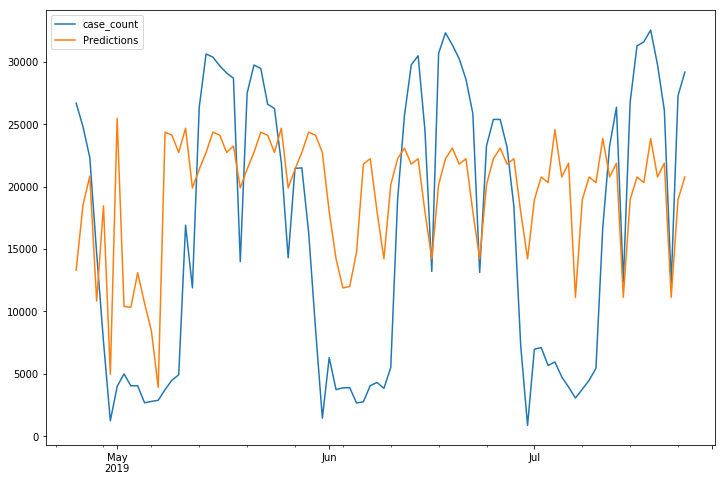

In [349]:
y_test['Predictions']=y_pred
y_test.plot(figsize=(12,8),legend=True)

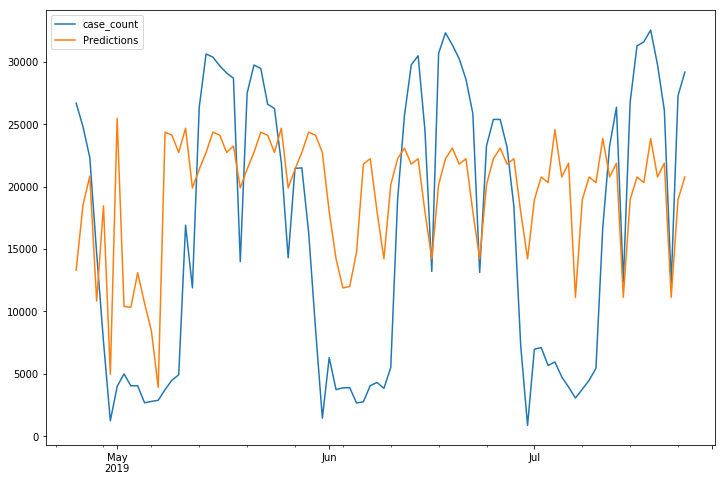

In [350]:
y_test.plot(figsize=(12,8),legend=True)

In [351]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             case_count   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     10.21
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           2.78e-37
Time:                        20:30:59   Log-Likelihood:                -8859.5
No. Observations:                 844   AIC:                         1.778e+04
Df Residuals:                     815   BIC:                         1.791e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ASSAM           1217.6689   2196.881      0.554      0.580   -3094.542    5529.880
BIHAR           5820.4101   2131.193      2.731      0.006    1637.136       1e+04
CHHATTISGARH    7742.1782   5364.590      1.443      0.149   -2787.863    1.83e+04
GUJARAT         4607.1994   6805.008      0.677      0.499   -8750.208     1.8e+04
HARYANA         3.578e-11   1.01e-11      3.534      0.000    1.59e-11    5.57e-11
JHARKHAND       7663.2015   1387.234      5.524      0.000    4940.228    1.04e+04
KARNATAKA      -1.901e+04   4068.856     -4.671      0.000    -2.7e+04    -1.1e+04
KERALA          9696.1208   6455.759      1.502      0.134   -2975.752    2.24e+04
MAHARASHTRA     5094.1203   1927.397      2.643      0.008    1310.873    8877.368
ORISSA         -1.901e+04   4068.856     -4.671      0.000    -2.7e+04    -1.1e+04
PUNJAB          2.389e-11   1.03e-11      2.310      0.021    3.59e-12    4.42e-11
TAMIL NADU     -1.901e+04   4068.856     -4.671      0.000    -2.7e+04    -1.1e+04
TRIPURA         8034.4769   2010.622      3.996      0.000    4087.869     1.2e+04
UTTAR PRADESH   9518.8635   4649.003      2.048      0.041     393.433    1.86e+04
WEST BENGAL     1.128e+04   4452.385      2.534      0.011    2544.598       2e+04
Holiday        -1546.3099   1248.844     -1.238      0.216   -3997.639     905.019
Days_Monday    -1249.1307    996.856     -1.253      0.211   -3205.839     707.577
Days_Saturday   -904.2798    999.773     -0.904      0.366   -2866.714    1058.154
Days_Sunday    -5791.3162    995.775     -5.816      0.000   -7745.901   -3836.731
Days_Thursday    240.0655    998.917      0.240      0.810   -1720.687    2200.818
Days_Wednesday   136.6709   1000.044      0.137      0.891   -1826.294    2099.636
Month_1         5199.4726   1898.700      2.738      0.006    1472.555    8926.390
Month_2         5912.8360   1943.136      3.043      0.002    2098.695    9726.977
Month_3         9032.6887   1907.824      4.735      0.000    5287.861    1.28e+04
Month_4         5064.4494   1848.386      2.740      0.006    1436.291    8692.608
Month_5         3497.5465   1646.380      2.124      0.034     265.902    6729.191
Month_6         3786.9545   1539.583      2.460      0.014     764.939    6808.970
Month_7         3522.1933   1507.256      2.337      0.020     563.631    6480.755
Month_8         1060.3498   1476.400      0.718      0.473   -1837.644    3958.343
Month_9         2231.0683   1468.900      1.519      0.129    -652.206    5114.342
Month_10         417.7907   1405.766      0.297      0.766   -2341.558    3177.140
year_2017       1.573e+04   3215.944      4.892      0.000    9418.909     2.2e+04
year_2018       5048.0923   1187.219      4.252      0.000    2717.724    7378.460
==============================================================================
Omnibus:        

In [352]:
X=X.drop(['Days_Tuesday','MADHYA PRADESH','Month_11'],axis=1)
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

KeyError: "['Days_Tuesday' 'MADHYA PRADESH' 'Month_11'] not found in axis"